## Feature Engineering and Encoding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
data = pd.read_csv(r'data\abnormal_order2.csv',index_col=0)

In [5]:
data.columns

Index(['order_id', 'order_time', 'cat', 'attribution', 'pro_id', 'pro_brand',
       'total_money', 'total_quantity', 'order_source', 'pay_type', 'user_id',
       'city', 'abnormal_label'],
      dtype='object')

#### 1. **Encoding and build benchmark**

In [6]:
data.head()

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score#进行实际的交叉验证计算
from sklearn.model_selection import KFold#确定交叉验证的具体方式
from sklearn.ensemble import RandomForestClassifier as RFC
#为什么选择随机森林做benchmark
#因为随机森林一般而言跑出来的效果都比较好，而且没有那么多可以调的参数，所以基本跑出来就是最好的结果，但随机森林的缺点
#就是时间比较慢，但是索性数据集不那么大

In [8]:
oe = OrdinalEncoder()

In [9]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [10]:
data.iloc[:,1:-1] #features

,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
2,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
4,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市
...,...,...,...,...,...,...,...,...,...,...,...
131277,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市
131278,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市
131279,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市
131280,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市


In [11]:
data.iloc[:,-1] #label

0         1
1         1
2         1
3         0
4         0
         ..
131277    0
131278    0
131279    0
131280    0
131281    0
Name: abnormal_label, Length: 131282, dtype: int64

In [12]:
X["order_time"] = X["order_time"].apply(lambda x:x[:2]) #transform to hours

In [14]:
X.head()

,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,14,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,14,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
2,10,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,23,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
4,16,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市


In [ ]:
#.fit(Xtrain)
#.transform(Xtrain)
#.transform(Xtest)

In [15]:
X = pd.DataFrame(oe.fit_transform(X))

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...
131277,23.0,11.0,0.0,4109.0,626.0,2128.0,0.0,1.0,4.0,71827.0,50.0
131278,23.0,11.0,0.0,4111.0,2363.0,2107.0,0.0,1.0,4.0,71827.0,50.0
131279,23.0,2.0,0.0,5964.0,803.0,705.0,0.0,7.0,0.0,2917.0,133.0
131280,23.0,3.0,0.0,5318.0,1760.0,533.0,0.0,7.0,0.0,60089.0,8.0


In [17]:
X.columns = data.iloc[:,1:-1].columns

In [20]:
X.head()

,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0


In [21]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=1412)

In [22]:
#我们使用最普通的K折交叉验证来建立benchmark

In [23]:
cv = KFold(n_splits=5,shuffle=True,random_state=1412) #5折，打乱数据集

In [24]:
#准确率

In [25]:
clf = RFC(n_estimators=200,random_state=1412) #树的数量=200

In [26]:
acc = cross_val_score(clf,Xtrain,Ytrain,cv=cv)

In [27]:
acc #5折交叉验证的准确率

array([0.8164309 , 0.81343852, 0.8179988 , 0.81223135, 0.81549595])

In [28]:
acc.mean()

0.8151191047453802

In [29]:
acc.var()

4.263794606012168e-06

In [30]:
#AUC

In [31]:
auc = cross_val_score(clf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")

In [32]:
auc

array([0.82654306, 0.83346791, 0.83091787, 0.82549833, 0.83015337])

In [33]:
auc.mean()

0.8293161073986793

In [34]:
auc.var()

8.553862268798834e-06

**模型的交叉验证平均准确率81.51%，方差7.58\*10^6，交叉验证平均AUC0.829，方差8.94\*10^6**，这就是我们的benchmark。由于我们在预处理时直接对全数据做了预处理，也没有做任何避免数据泄露的特征工程，因此模型的效果是会虚高的，真实的状况应该比这个分数要低。

#### 2. **Split Train Dataset and Test Dataset**

In [36]:
data.groupby("order_id").count().mean()

order_time        1.149509
cat               1.149509
attribution       1.149509
pro_id            1.149509
pro_brand         1.149509
total_money       1.149509
total_quantity    1.149509
order_source      1.149509
pay_type          1.149509
user_id           1.149509
city              1.149509
abnormal_label    1.149509
dtype: float64

In [37]:
data.groupby("order_id").count().mean()[0]

1.1495092244783596

首先，分割训练ID和测试集ID。

In [40]:
orderid = data["order_id"].unique()

In [41]:
len(orderid) #一共有11.4w个订单id

114207

In [42]:
orderid

array([4283851335, 4276537082, 4281111595, ..., 4285765029, 4285770012,
       4285770056])

In [43]:
#直接从全ID中，按照30%的比例，抽出测试用的ID
#random.sample(需要抽样的总列表，需要抽样的比例)
int(len(orderid)*0.3)

34262

In [44]:
###====【TIME WARNING：2mins】===###
import random
random.seed(1412)
test_id=random.sample(orderid.tolist(),int(len(orderid)*0.3))

train_id = orderid.copy().tolist() #全id
for i in test_id:
    train_id.remove(i)

In [45]:
len(test_id)

34262

In [46]:
len(train_id)

79945

然后，根据分割出的订单ID，将数据中的样本标记出来

In [47]:
data["split"] = "train"

In [48]:
data.head()

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label,split
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1,train
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1,train
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,train
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0,train
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0,train


In [49]:
###====【TIME WARNING：2mins】===###
for i in test_id:
    data.loc[data["order_id"]==i,"split"] = "test"

In [50]:
data.head()

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label,split
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1,train
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1,test
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,train
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0,test
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0,train


In [51]:
train = data.loc[data["split"] == "train",:]
test = data.loc[data["split"] == "test",:]

In [52]:
train.shape

(91868, 14)

In [53]:
test.shape

(39414, 14)

In [54]:
#实际比例
39414/(91868+39414) #几乎就是30%

0.30022394539997865

In [55]:
train.head() #索引混乱

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label,split
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1,train
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,train
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0,train
6,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0,train
7,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,0,train


In [56]:
#恢复索引并删除分割
for i in [train,test]:
    i.index = range(i.shape[0])
    i.drop(columns="split",inplace=True)

/var/folders/6r/w39cs75945v35_75hhr9_2nw0000gn/T/ipykernel_48552/3394330115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(columns="split",inplace=True)
/var/folders/6r/w39cs75945v35_75hhr9_2nw0000gn/T/ipykernel_48552/3394330115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(columns="split",inplace=True)


In [57]:
train.shape

(91868, 13)

In [58]:
test.shape

(39414, 13)

In [59]:
train.head()

,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
2,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
3,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0
4,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,0


In [60]:
#为了后续的特征工程和数据预处理，将标签列放到第一列
Xtrain = train.iloc[:,:-1]
Xtest = test.iloc[:,:-1]
Ytrain = train.iloc[:,-1]
Ytest = test.iloc[:,-1]

In [61]:
#Xtrain
#Ytrain
#Xtest
#Ytest

In [62]:
train = pd.concat([Ytrain,Xtrain],axis=1)#将标签放在第一列，方便之后做特征工程
test = pd.concat([Ytest,Xtest],axis=1)

In [63]:
train.head()

,abnormal_label,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市


In [64]:
test.head()

,abnormal_label,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
1,0,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
2,0,4245023523,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,0,4284515355,15:43:05,生活电器厨卫电器,POP,8001873245,佳星,21450.0,50,主站,合并支付,1382227461,广州市
4,0,4284735147,17:12:53,家居日用,POP,8002202146,奕辰,1950.0,50,主站,合并支付,sagggff,天津市


In [65]:
#将训练集与测试集单独保存
train.to_csv(r'data\train_bf.csv')
test.to_csv(r'data\test_bf.csv')

#### 3.**异常交易vs普通订单：下单时间有区别吗？**

In [66]:
train = pd.read_csv(r'data\train_bf.csv',index_col=0)
test = pd.read_csv(r'data\test_bf.csv',index_col=0)

In [67]:
train.head()

,abnormal_label,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市


- **关系探索**

In [68]:
#对比异常的下单时间与普通订单时间的对比

In [69]:
import time
import datetime

In [70]:
#将时间字符串按小时数提取为单独的Series

In [70]:
train["order_time"][0][:2]

'14'

In [71]:
Hour = train.loc[:,"order_time"].apply(lambda x: int(x[:2])) #注意：这里没有覆盖原始数据而是新生成了一个对象

In [72]:
Hour

0        14
1        10
2        16
3        21
4        16
         ..
91863    23
91864    23
91865    23
91866    23
91867    23
Name: order_time, Length: 91868, dtype: int64

In [75]:
Hour[train['abnormal_label'] == 1] #得到异常订单的小时数

0        14
1        10
14       10
22       15
27        9
         ..
24954    23
24955    23
24956    23
24957    23
24958    23
Name: 下单时间, Length: 19915, dtype: int64

In [73]:
Hour[train['abnormal_label'] == 1].value_counts()

21    1579
20    1554
10    1379
9     1371
22    1297
11    1295
12    1036
23    1031
8     1003
19     981
16     972
13     971
15     961
14     904
18     811
0      798
17     773
1      343
7      252
2      188
6      144
3      111
5       86
4       75
Name: order_time, dtype: int64

In [74]:
#计算每个区间内的交易数量

In [76]:
OrderTime_ab = Hour[train["abnormal_label"] == 1].value_counts()

In [77]:
OrderTime_normal = Hour[train["abnormal_label"] == 0].value_counts()

In [78]:
import seaborn as sns

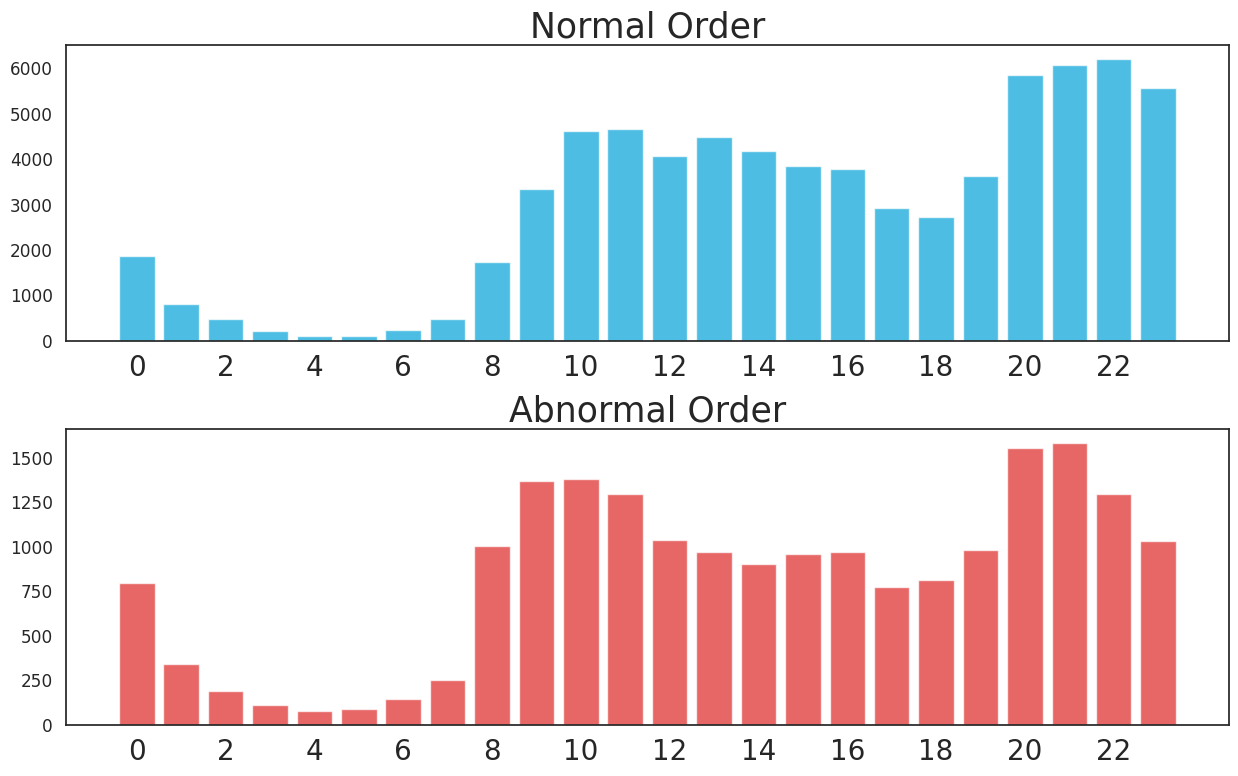

In [81]:
plt.figure(figsize=(15,9),dpi=100)
sns.set(style="white",font="Simhei", font_scale=1.1)
#绘制三个坐标轴不一样的图像

#上
plt.subplot(211)
plt.bar(OrderTime_normal.index,OrderTime_normal.values,color="#01a2d9",alpha=0.7)
plt.title("Normal Order",fontsize=25)
plt.xticks(ticks = range(0,24,2),fontsize=20)


#下
plt.subplot(212)
plt.bar(OrderTime_ab.index,OrderTime_ab.values,color="#dc2624",alpha=0.7)
plt.title("Abnormal Order",fontsize=25)
plt.xticks(ticks = range(0,24,2),fontsize=20)

plt.subplots_adjust(hspace=0.3)
plt.show()

如果两种类型的订单下单时间有区别，那异常交易一般倾向于发生在半夜、凌晨或是其他不常见的时间。但很明显，异常交易与普通订单的下单时间并无显著差异，**下单时间很可能与交易是否异常无关**。

但无论如何，我们保留这个特征，并将其转化为小时和分钟。其中小时按24小时进行编码，分钟按前半小时、后半小时分别编码为0与1。

- **特征编码**

In [82]:
train["order_time"]

0        14:09:49
1        10:44:46
2        16:47:34
3        21:15:59
4        16:49:49
           ...   
91863    23:56:01
91864    23:57:24
91865    23:54:34
91866    23:55:06
91867    23:58:59
Name: order_time, Length: 91868, dtype: object

时间是一个很特殊的特征，由于训练集和测试集都是按照完全客观的方式进行编码，且编码的方式与训练集中的具体数值并无关系，因此不存在
泄露问题，可以使用最简单的编码方式，用lambda来编码

In [83]:
train['hour'] = train['order_time'].apply(lambda x: int(x[:2]))
test['hour'] = test['order_time'].apply(lambda x: int(x[:2]))

In [84]:
train['minites'] = train['order_time'].apply(lambda x: int(int(x[3:5])>30))
test['minutes'] = test['order_time'].apply(lambda x: int(int(x[3:5])>30))

In [85]:
train.head()

,abnormal_label,order_id,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1
2,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1
3,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0
4,0,4276159555,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1


- delete 'order_time'

In [88]:
train.drop(columns="order_time",inplace=True)
test.drop(columns="order_time",inplace=True)

In [89]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

#### 4.**支付方式：支付渠道的异常风险评估**

In [358]:
#train = pd.read_csv(r'data\train.csv',index_col=0)
#test = pd.read_csv(r'data\test.csv',index_col=0)

在数据集中，共有五大类支付方式，而五大类支付方式下的订单异常风险不同。有的支付方式可能有很高的风险，例如合并支付。如果商家进行刷单，或者竞争对手恶意刷单，那他们应该会倾向于使用简单明了的合并支付或在线支付方式。同时，货到付款时一个异常风险很低的方式，因为平台的“货到付款”功能往往只开放给极度受信任、或信用评级很高的用户，因此很少会出现恶意订单。相对的，货到付款的主要异常风险在于物流风险。

- 异常风险的关键评估指标：异常率

**异常率是指异常交易/全部交易的比例，异常率越高则说明异常风险越高**。对于每个特征，我们都可以计算其不同类别下的异常率，以确定特定特征/特定类别与异常风险的关系。

In [90]:
train["pay_type"].value_counts()

合并支付    71893
货到付款    18321
当当支付     1226
在线支付      290
账户余额      138
Name: pay_type, dtype: int64

可以通过计算异常率来衡量不同支付方式的风险

In [92]:
train.groupby(by="pay_type")["abnormal_label"].sum()

pay_type
合并支付    19783
在线支付       73
当当支付       55
账户余额        4
货到付款        0
Name: abnormal_label, dtype: int64

In [91]:
train.groupby(by="pay_type")["abnormal_label"].count()

pay_type
合并支付    71893
在线支付      290
当当支付     1226
账户余额      138
货到付款    18321
Name: abnormal_label, dtype: int64

In [93]:
train.groupby(by="pay_type")["abnormal_label"].sum()/train.groupby(by="pay_type")["abnormal_label"].count()

pay_type
合并支付    0.275173
在线支付    0.251724
当当支付    0.044861
账户余额    0.028986
货到付款    0.000000
Name: abnormal_label, dtype: float64

In [94]:
train.groupby(by="pay_type")["abnormal_label"].mean() #每种支付方式下的异常率

pay_type
合并支付    0.275173
在线支付    0.251724
当当支付    0.044861
账户余额    0.028986
货到付款    0.000000
Name: abnormal_label, dtype: float64

In [95]:
dict(train.groupby("pay_type")["abnormal_label"].mean()) #转变成字典

{'合并支付': 0.27517282628350465,
 '在线支付': 0.2517241379310345,
 '当当支付': 0.044861337683523655,
 '账户余额': 0.028985507246376812,
 '货到付款': 0.0}

果然，合并支付与在线支付两种方式的异常率很高，占了该支付方式下全部样本的25%以上，剩下的支付方式风险很小。我们可以将该异常率作为**聚合特征**放入特征矩阵。**聚合特征是使用groupby函数对离散型变量进行聚合后获得的新特征，该新特征中每一个类别对应一个值，该值对于该类别具有某种业务意义**。在实际应用中，大量增加聚合特征可以极大诚度地提升树及集成模型的表现。所以理论上来说，只要有业务意义，我们可以按照支付支付方式对任意特征进行聚合。在这里，我们对异常特征聚合求解异常率作为例子。

以下是计算聚合异常率并放入特征矩阵的函数：

In [96]:
def GroupByFeature(column,train,test,newcolumn):
    
    #使用训练集数据创建字典
    dic = dict(train.groupby(column)["abnormal_label"].mean())
    
    #建立新特征
    train[newcolumn] = train[column].map(dic)
    #测试集上映射的数字是训练集上计算出来的
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [97]:
train,test = GroupByFeature("pay_type",train,test,"pay_type_anomaly_rate") #调用函数

In [98]:
train.head()#已经将每一个类别的异常率映射到了每一个样本上

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,pay_type_anomaly_rate
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0,0.275173
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1,0.275173
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1,0.275173
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0,0.275173
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1,0.275173


In [99]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minutes,pay_type_anomaly_rate
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,14,0,0.275173
1,0,3977175284,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,23,0,0.275173
2,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1,0.275173
3,0,4284515355,生活电器厨卫电器,POP,8001873245,佳星,21450.0,50,主站,合并支付,1382227461,广州市,15,1,0.275173
4,0,4284735147,家居日用,POP,8002202146,奕辰,1950.0,50,主站,合并支付,sagggff,天津市,17,0,0.275173


- **Feature Encoding**

In [102]:
feature = train.loc[:,"pay_type"]

In [103]:
feature.head()

0    合并支付
1    合并支付
2    合并支付
3    合并支付
4    合并支付
Name: pay_type, dtype: object

In [104]:
feature.unique()

array(['合并支付', '当当支付', '货到付款', '账户余额', '在线支付'], dtype=object)

In [105]:
unique_ = np.sort(feature.unique()) #排序

In [106]:
unique_

array(['合并支付', '在线支付', '当当支付', '账户余额', '货到付款'], dtype=object)

In [107]:
[*enumerate(unique_)] #用enumerate给每个类别进行编号

[(0, '合并支付'), (1, '在线支付'), (2, '当当支付'), (3, '账户余额'), (4, '货到付款')]

In [108]:
dic = {} #建立字典
for code, category in enumerate(unique_):
    dic[category] = code


In [109]:
dic

{'合并支付': 0, '在线支付': 1, '当当支付': 2, '账户余额': 3, '货到付款': 4}

In [110]:
feature.map(dic)

0        0
1        0
2        0
3        0
4        0
        ..
91863    4
91864    4
91865    0
91866    0
91867    0
Name: pay_type, Length: 91868, dtype: int64

In [112]:
def encodePay(column,train,test):
    "本函数用于转化支付方式"
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #如果需要，重建用于覆盖的特征
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [114]:
train,test = encodePay("pay_type",train,test)

In [115]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,pay_type_anomaly_rate
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,14,0,0.275173
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,0.275173
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,16,1,0.275173
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,宿迁市,21,0,0.275173
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,西安市,16,1,0.275173


In [116]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minutes,pay_type_anomaly_rate
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,泉州市,14,0,0.275173
1,0,3977175284,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,0,swt6263122,宁德市,23,0,0.275173
2,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,0.275173
3,0,4284515355,生活电器厨卫电器,POP,8001873245,佳星,21450.0,50,主站,0,1382227461,广州市,15,1,0.275173
4,0,4284735147,家居日用,POP,8002202146,奕辰,1950.0,50,主站,0,sagggff,天津市,17,0,0.275173


In [113]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

#### 5. **城市：收货地点的风险评估**

In [166]:
train = pd.read_csv(r'data\train.csv',index_col=0)
test = pd.read_csv(r'data\test.csv',index_col=0)

从理论上来说，收货地点与交易异常应该不存在明显的联系，但我们还是可以使用异常率来进行相关的评估。需要注意的是，城市的类别虽然只有365个，但还是远远超出一般离散型特征的分类个数，如果按照这个数量的类别进行风险评估，很难看出有用的趋势。我们需要降低城市类别数量再进行风险评估。在这里，我们将365个城市按照省进行分类，并按省份进行聚合。

- **按省份进行处理**

In [167]:
train["city"].value_counts()

北京市        9578
上海市        4514
广州市        4157
深圳市        3717
天津市        2250
           ... 
昌都地区          1
广东省其他城市       1
四川省其他城市       1
神农架林区         1
福建省其他城市       1
Name: city, Length: 362, dtype: int64

由于分类太多，无法看出趋势,所以决定将362个城市按照省份进行聚合

In [168]:
ChinaCity = pd.read_excel(r"ChinaCity.xls",index_col=1) #网上下载

In [169]:
ChinaCity

,省份
市级,
北京市,北京市
天津市,天津市
石家庄市,河北省
唐山市,河北省
秦皇岛市,河北省
...,...
辽宁省其他城市,辽宁省
四川省其他城市,四川省
广东省其他城市,广东省


In [170]:
#化为Series，方便字典的建立
ChinaCity["省份"]

市级
北京市        北京市
天津市        天津市
石家庄市       河北省
唐山市        河北省
秦皇岛市       河北省
          ... 
辽宁省其他城市    辽宁省
四川省其他城市    四川省
广东省其他城市    广东省
云南省其他城市    云南省
福建省其他城市    福建省
Name: 省份, Length: 409, dtype: object

In [171]:
#dict(ChinaCity["省份"])
ChinaCity["省份"].to_dict()

{'北京市': '北京市',
 '天津市': '天津市',
 '石家庄市': '河北省',
 '唐山市': '河北省',
 '秦皇岛市': '河北省',
 '邯郸市': '河北省',
 '邢台市': '河北省',
 '保定市': '河北省',
 '张家口市': '河北省',
 '承德市': '河北省',
 '沧州市': '河北省',
 '廊坊市': '河北省',
 '衡水市': '河北省',
 '太原市': '山西省',
 '大同市': '山西省',
 '阳泉市': '山西省',
 '长治市': '山西省',
 '晋城市': '山西省',
 '朔州市': '山西省',
 '忻州市': '山西省',
 '吕梁市': '山西省',
 '晋中市': '山西省',
 '临汾市': '山西省',
 '运城市': '山西省',
 '呼和浩特市': '内蒙古自治区',
 '包头市': '内蒙古自治区',
 '乌海市': '内蒙古自治区',
 '赤峰市': '内蒙古自治区',
 '呼伦贝尔市': '内蒙古自治区',
 '兴安盟': '内蒙古自治区',
 '通辽市': '内蒙古自治区',
 '锡林郭勒盟': '内蒙古自治区',
 '乌兰察布市': '内蒙古自治区',
 '鄂尔多斯市': '内蒙古自治区',
 '巴彦淖尔市': '内蒙古自治区',
 '阿拉善盟': '内蒙古自治区',
 '沈阳市': '辽宁省',
 '大连市': '辽宁省',
 '鞍山市': '辽宁省',
 '抚顺市': '辽宁省',
 '本溪市': '辽宁省',
 '丹东市': '辽宁省',
 '锦州市': '辽宁省',
 '营口市': '辽宁省',
 '阜新市': '辽宁省',
 '辽阳市': '辽宁省',
 '盘锦市': '辽宁省',
 '铁岭市': '辽宁省',
 '朝阳市': '辽宁省',
 '葫芦岛市': '辽宁省',
 '长春市': '吉林省',
 '吉林市': '吉林省',
 '四平市': '吉林省',
 '辽源市': '吉林省',
 '通化市': '吉林省',
 '白山市': '吉林省',
 '松原市': '吉林省',
 '白城市': '吉林省',
 '延边州': '吉林省',
 '哈尔滨市': '黑龙江省',
 '齐齐哈尔市': '黑龙江省',
 '鸡西市': '黑龙江省',
 '鹤岗市': '黑龙

In [172]:
train["province"] = train["city"].map(ChinaCity["省份"].to_dict())

In [173]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,province
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0,上海市
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1,广东省
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1,广东省
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0,江苏省
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1,陕西省


当使用map的时候，如果dataframe的特征中出现了map中没有的类别，就会被映射成空值

In [174]:
#由于匹配数据不是我们自己编写，一定要确认map之后没有缺失值
train["province"].isnull().sum()

0

计算每个省份的异常率

In [175]:
train.groupby(["province"])["abnormal_label"].mean().sort_values(ascending=False)

province
青海省         0.382979
内蒙古自治区      0.309628
西藏自治区       0.272727
山西省         0.256000
甘肃省         0.255043
海南省         0.250318
江西省         0.245702
北京市         0.241595
陕西省         0.236769
河北省         0.236292
宁夏回族自治区     0.233161
重庆市         0.232558
新疆维吾尔自治区    0.231325
河南省         0.225344
吉林省         0.223310
广东省         0.222260
浙江省         0.219894
山东省         0.217832
湖北省         0.217329
福建省         0.215807
天津市         0.215111
江苏省         0.212617
辽宁省         0.211465
云南省         0.207724
湖南省         0.207155
上海市         0.206912
广西壮族自治区     0.201106
四川省         0.190524
黑龙江省        0.181818
安徽省         0.159470
贵州省         0.072279
Name: abnormal_label, dtype: float64

In [176]:
df = train.groupby(["province"])["abnormal_label"].mean().sort_values(ascending=False)

异常率在省份上表现出较大的差异，其中青海、内蒙古自治区、以及西藏自治区的的异常率远高于其他城市，可能是由于物流发展程度较低导致。同时异常订单较多的省市或多或少都有大量少数民族自治区。同时安徽、黑龙江、四川、贵州异常率很低（低于20%），光从省份上来说很难看出实际原因，可能是订单本身较少的缘故。其他大部分城市的异常率都在20~25%之间，说明这个异常率对各个省份来说都是正常的。现在，我们可以将依据省份进行聚合的异常率作为新的特征放入特征矩阵。

In [177]:
#对train和test创造省份这个特征
train["province"] = train["city"].map(ChinaCity["省份"].to_dict())
test["province"] = test["city"].map(ChinaCity["省份"].to_dict())

In [178]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,province
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0,上海市
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1,广东省
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1,广东省
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0,江苏省
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1,陕西省


In [179]:
#检查是否需要在特征构建函数上稍作修改
def GroupByFeature(column,train,test,newcolumn):
    
    #使用训练集数据创建字典
    #dic = dict(train.groupby(column)["异常"].mean())
    dic = (train.groupby(column)["abnormal_label"].mean()).to_dict()
    
    #建立新特征
    train[newcolumn] = train[column].map(dic)
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [180]:
train, test = GroupByFeature("province",train,test,"province_abnormal_label")

In [181]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,province,province_abnormal_label
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0,上海市,0.206912
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1,广东省,0.222260
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1,广东省,0.222260
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0,江苏省,0.212617
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1,陕西省,0.236769


再次确认训练集、测试集中没有缺失值。

In [182]:
train.isnull().sum().sum()

0

In [183]:
test.isnull().sum().sum()

6

测试集中出现了缺失值，这说明映射数据的时候，测试集中出现了字典中没有包括的城市。现在我们可以看到缺失值较少，因此我们可以手动进行处理，但之后对于其他也有可能出现相似情况的特征，我们需要在编码函数中进行调整。

In [184]:
test.isnull().sum()

abnormal_label             0
order_id                   0
cat                        0
attribution                0
pro_id                     0
pro_brand                  0
total_money                0
total_quantity             0
order_source               0
pay_type                   0
user_id                    0
city                       0
hour                       0
minutes                    0
province                   3
province_abnormal_label    3
dtype: int64

In [185]:
test[test["province"].isnull()]

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minutes,province,province_abnormal_label
9393,1,4282946649,手机摄影数码,GO,1000376628,斐讯,399.0,1,主站,合并支付,aiai131452,山西省其他城市,7,1,NaN,NaN
11613,0,3809475249,母婴用品玩具,POP,8001276188,大贸商,109.0,1,主站,合并支付,guoqingas,山东省其他城市,10,1,NaN,NaN
35611,0,4283977714,生活电器厨卫电器,GO,1000006426,飞利浦,299.0,1,主站,货到付款,1587002842,江西省其他城市,13,1,NaN,NaN


In [186]:
test.loc[9393,"province"] = "山西省" #手动填写缺失值
test.loc[11613,"province"] = "山东省"
test.loc[35611,"province"] = "江西省"

In [187]:
test.loc[test["province"]=="山西省","province_abnormal_label"] #找出山西省省份异常率

140      0.256
469      0.256
503      0.256
560      0.256
605      0.256
         ...  
39180    0.256
39213    0.256
39312    0.256
39315    0.256
39327    0.256
Name: province_abnormal_label, Length: 746, dtype: float64

In [188]:
test.loc[test["province"]=="山东省","province_abnormal_label"] #找出山东省省份异常率

27       0.217832
84       0.217832
94       0.217832
103      0.217832
105      0.217832
           ...   
39270    0.217832
39286    0.217832
39287    0.217832
39288    0.217832
39358    0.217832
Name: province_abnormal_label, Length: 2528, dtype: float64

In [189]:
test.loc[test["province"]=="江西省","province_abnormal_label"] #找出江西省省份异常率

62       0.245702
82       0.245702
95       0.245702
149      0.245702
276      0.245702
           ...   
39033    0.245702
39086    0.245702
39147    0.245702
39148    0.245702
39258    0.245702
Name: province_abnormal_label, Length: 554, dtype: float64

In [190]:
test.loc[9393,"province_abnormal_label"] = 0.256 #分别赋值 替换空值
test.loc[11613,"province_abnormal_label"] = 0.217832
test.loc[35611,"province_abnormal_label"] = 0.245702

In [191]:
test.isnull().sum().sum()

0

- **特征编码**

现在我们有两个特征需要编码，一个是城市，另一个是省份。

In [192]:
def encodeCityProvince(column,train,test):
    "本函数用于编码城市与省份"
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #编码训练集
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [193]:
for column in ["city","province"]:
    train,test = encodeCityProvince(column,train,test)

In [194]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minites,province,province_abnormal_label
0,1,4283851335,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,5,14,0,0,0.206912
1,1,4281111595,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,131,10,1,11,0.222260
2,0,4106833871,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,220,16,1,11,0.222260
3,0,4253622967,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,115,21,0,14,0.212617
4,0,4276159555,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,289,16,1,28,0.236769


In [195]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,hour,minutes,province,province_abnormal_label
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,204.0,14,0,23,0.215807
1,0,3977175284,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,101.0,23,0,23,0.215807
2,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,131.0,10,1,11,0.222260
3,0,4284515355,生活电器厨卫电器,POP,8001873245,佳星,21450.0,50,主站,合并支付,1382227461,131.0,15,1,11,0.222260
4,0,4284735147,家居日用,POP,8002202146,奕辰,1950.0,50,主站,合并支付,sagggff,95.0,17,0,6,0.215111


In [196]:
test.isnull().sum()

abnormal_label             0
order_id                   0
cat                        0
attribution                0
pro_id                     0
pro_brand                  0
total_money                0
total_quantity             0
order_source               0
pay_type                   0
user_id                    0
city                       3
hour                       0
minutes                    0
province                   0
province_abnormal_label    0
dtype: int64

同样出现了缺失值，由于数量较少，因此我们也手动调整。说明测试集中出现了在训练集中没有出现过的数字。

In [197]:
test["city"].value_counts()

50.0     4066
5.0      1996
131.0    1786
220.0    1577
95.0     1005
         ... 
245.0       1
224.0       1
261.0       1
28.0        1
41.0        1
Name: city, Length: 349, dtype: int64

In [198]:
test.loc[test["city"].isnull(), "city"]

9393    NaN
11613   NaN
35611   NaN
Name: city, dtype: float64

In [199]:
train['city'].value_counts()

50     9578
5      4514
131    4157
220    3717
95     2250
       ... 
166       1
128       1
84        1
259       1
261       1
Name: city, Length: 362, dtype: int64

In [200]:
train['city'].max()

361

In [201]:
test.loc[test["city"].isnull(),"city"] = 362

- 将处理完的特征单独保存

In [202]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

#### 6.**商品类别、订单渠道以及商品渠道**

In [406]:
#train = pd.read_csv(r'data\train.csv',index_col=0)
#test = pd.read_csv(r'data\test.csv',index_col=0)

**如果某一类/某一件商品具有较高的退货、敲诈、纠纷风险，那这一类/一件商品的订单中、异常订单的比例应该很高**。如果存在这种商品，我们则可以在特征工程中单独标注高风险商品。同理，对于订单渠道和商品渠道，我们也可以按异常率增加特征。

先来看商品类别。通过对比每种商品类别下的异常订单率，我们可以确定是否存在异常情况特别多的商品类别：

In [203]:
train['cat'].value_counts()

手机摄影数码       14440
生活电器厨卫电器     13443
家纺寝居         12485
电脑办公打印文仪      7878
家居日用          7372
美妆个护          6407
电视冰箱洗衣机空调     6168
汽车用品          4557
家具建材          3310
食品酒水          3253
健康医疗          2971
服饰鞋帽          2872
运动户外          2760
母婴用品玩具        1842
箱包奢品          1389
钟表首饰           570
图书音像           151
Name: cat, dtype: int64

In [204]:
train.groupby("cat")["abnormal_label"].mean()

cat
健康医疗         0.233255
图书音像         0.284768
家具建材         0.262840
家居日用         0.235079
家纺寝居         0.173088
手机摄影数码       0.261565
服饰鞋帽         0.276811
母婴用品玩具       0.173181
汽车用品         0.229976
生活电器厨卫电器     0.193856
电脑办公打印文仪     0.215029
电视冰箱洗衣机空调    0.201848
箱包奢品         0.349172
美妆个护         0.148900
运动户外         0.234420
钟表首饰         0.343860
食品酒水         0.199508
Name: abnormal_label, dtype: float64

In [205]:
df = train.groupby("cat")["abnormal_label"].mean()

In [206]:
df = df.sort_values()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22918 (\N{CJK UNIFIED IDEOGRAPH-5986}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25252 (\N{CJK UNIFIED IDEOGRAPH-62A4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  fig.canvas.print_figure(bytes_

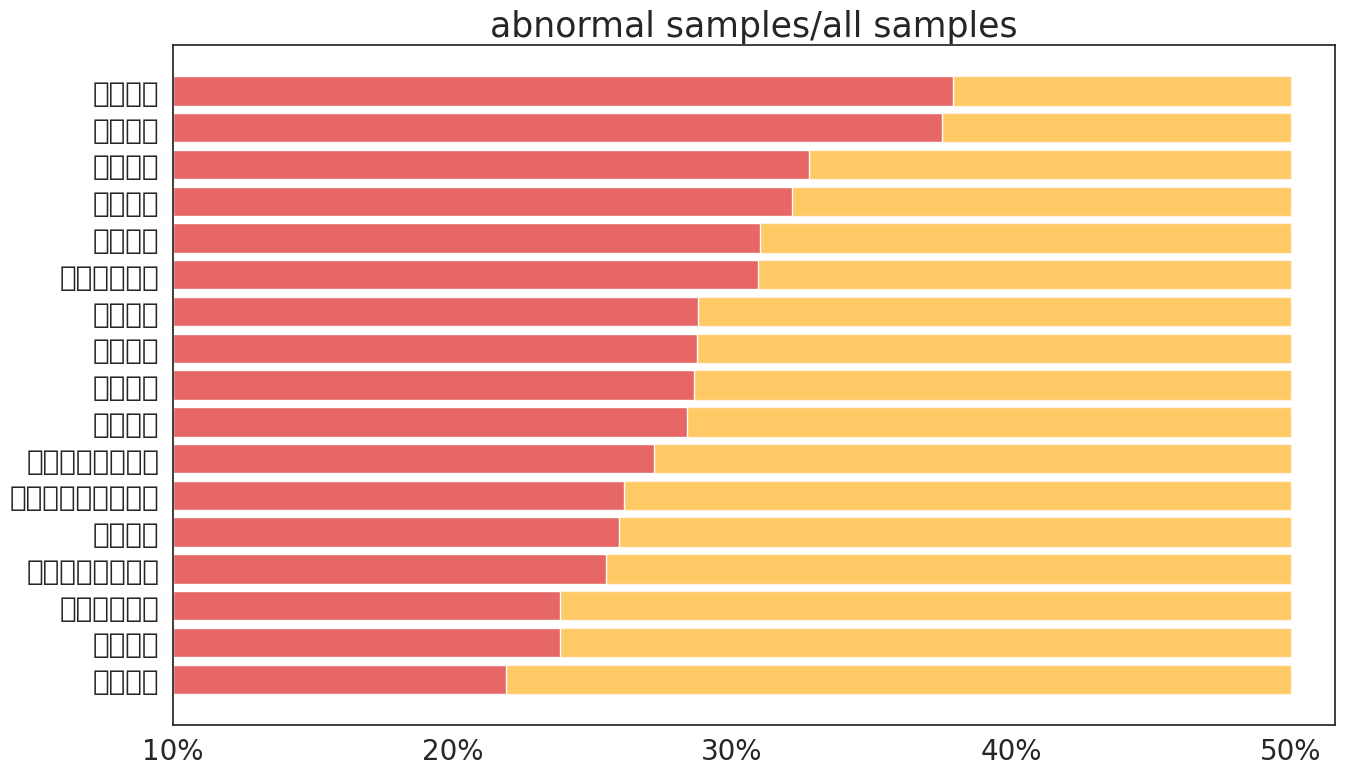

In [210]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Set font for English text
plt.rcParams['axes.unicode_minus'] = False   # Fix for negative number display issue
plt.figure(figsize=(15,9),dpi=100)
sns.set(style="white",font="Simhei", font_scale=1.1)
#绘制三个坐标轴不一样的图像

plt.barh(df.index,0.5,color="orange",alpha=0.6,)
plt.barh(df.index,df.values,color="#e66765",alpha=1)
plt.title("abnormal samples/all samples",fontsize=25)
plt.xlim(0, 0.52)
plt.xticks(ticks=np.linspace(0,0.5,num=5),labels=["10%","20%","30%","40%","50%"],fontsize=20)
plt.yticks(range(17),df.index,fontsize=20)
plt.show()

从结果来看，异常交易比例最高的是钟表首饰、箱包奢品、图书音像，最低的是家纺、母婴用品以及美妆产品，但并未出现某一品类的异常比例严重高于其他品类的情况。异常率可以衡量一个品类的商品“可能是异常交易的风险”，因此在特征工程中，我们可以**将品类异常率作为一个聚合特征，放入我们的特征矩阵**。

In [211]:
train.groupby("order_source")["abnormal_label"].mean().sort_values(ascending=False)

order_source
手机团购          0.501931
抢购            0.400281
手机抢购          0.339863
团购            0.330159
手机站点          0.287742
当当            0.209125
主站            0.167849
do.site_id    0.097698
Name: abnormal_label, dtype: float64

In [212]:
df2 = train.groupby("order_source")["abnormal_label"].mean().sort_values()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_

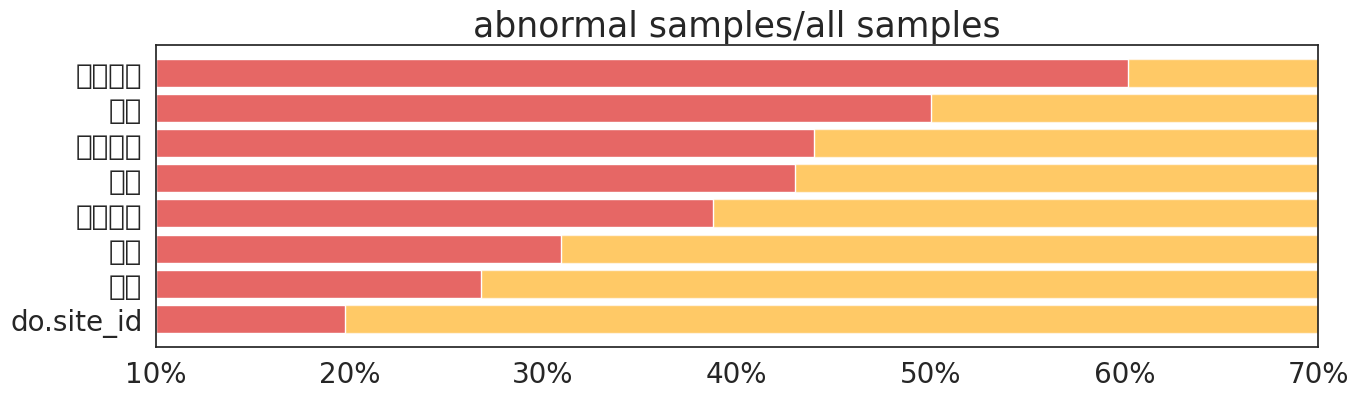

In [218]:
plt.figure(figsize=(15,4),dpi=100)
sns.set(style="white",font="Simhei", font_scale=1.1)
#绘制三个坐标轴不一样的图像

plt.barh(df2.index,1,color="orange",alpha=0.6,)
plt.barh(df2.index,df2.values,color="#e66765",alpha=1)
plt.title("abnormal samples/all samples",fontsize=25)
plt.xlim(0, 0.52)
plt.xticks(ticks=np.linspace(0,0.6,num=7),labels=["10%","20%","30%","40%","50%","60%","70%"],fontsize=20)
plt.yticks(range(len(df2)),df2.index,fontsize=20)
plt.show()

不难发现团购、抢购模式出现异常的可能性很高，同时移动端比PC端出现异常的可能性更高。

In [220]:
train.groupby("attribution")["abnormal_label"].mean().sort_values(ascending=False)

attribution
POP    0.294727
GO     0.178732
Name: abnormal_label, dtype: float64

商品所属渠道中，POP店铺的异常率更高，而官方自营店铺的异常率较低。

- **加入新特征**

In [223]:
for i in ["cat","order_source","attribution"]:
    train, test = GroupByFeature(i,train,test,i+"_abnormal_rate")

In [228]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,hour,minites,province,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate
0,1,4283851335,5,POP,8002042497,三星,766000.0,200,1,合并支付,...,14,0,0,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727
1,1,4281111595,2,POP,8002199518,纬度空间,100.0,100,1,合并支付,...,10,1,11,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727
2,0,4106833871,3,POP,8002212182,品道天元,8800.0,100,1,合并支付,...,16,1,11,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727
3,0,4253622967,10,POP,8001748897,清华同方,880.0,100,1,合并支付,...,21,0,14,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727
4,0,4276159555,3,GO,1000341307,乐扣乐扣,4900.0,100,1,合并支付,...,16,1,28,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732


- **特征编码**

In [229]:
def EasyEncode(column,train,test):
    "本函数用于编码城市与省份"
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #如果需要，重建用于覆盖的特征
    train[column] = train[column].map(dic)
    
    #使用训练集上生成的字典转化测试集
    test[column] = test[column].map(dic)
    
    return train,test

In [230]:
for i in ["cat","order_source","attribution"]:
    train,test = EasyEncode(i,train,test)

In [231]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,hour,minites,province,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate
0,1,4283851335,5,1,8002042497,三星,766000.0,200,1,合并支付,...,14,0,0,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727
1,1,4281111595,2,1,8002199518,纬度空间,100.0,100,1,合并支付,...,10,1,11,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727
2,0,4106833871,3,1,8002212182,品道天元,8800.0,100,1,合并支付,...,16,1,11,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727
3,0,4253622967,10,1,8001748897,清华同方,880.0,100,1,合并支付,...,21,0,14,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727
4,0,4276159555,3,0,1000341307,乐扣乐扣,4900.0,100,1,合并支付,...,16,1,28,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732


In [232]:
#检查缺失值
train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [233]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

#### 7. **多类别字段的预处理：用户ID&商品ID&商品品牌**

In [234]:
train = pd.read_csv(r'data\train.csv',index_col=0)
test = pd.read_csv(r'data\test.csv',index_col=0)

在我们的数据集中，用户ID、商品ID及商品品牌是非常特殊的三个离散型特征。在一般的数据中，ID这种带有一定唯一性的特征，都可以采取直接删除或无视的处理方法，但在我们现在特殊的预测场景下，订单可能因为涉及到异常用户、异常商品甚至异常品牌因此被判做“异常”，所以我们需要保留用户ID、商品ID、商品品牌这三个特征，还需要对这三个特征进行探索和处理。这三个类别在业务上看似关系不大，但在数据处理上却可以当做一类数据，他们两个共同点：

- **可能出现一个ID/品牌只对应一个样本的情况**<br>
    在一个商品类别/一个收获城市下，最少也有几十上百次交易，因此交易中的异常率可以被认为是大量实验后的可信结果。<br>
    但一个商品或一个品牌可能在全年之中只有寥寥几笔交易（甚至一笔），对于用户来说，全年可能只进行一次交易。<br>
    这种情况下无论交易是异常还是正常，都无法被用来评估该商品/用户的风险。因此我们需要将样本分为两类：<br>
    > (1) 交易过少无法判断的类型<br>
    > (2) 交易量足够、可以衡量风险的类型<br>
    
    对交易过少的类型我们进行特殊标记，对交易足够的类型使用异常率。    

- **对比其他离散型特征如商品以及类别、城市等，这三个特征中的类别数量尤其地多**<br>
    当我们在分割训练集与测试集时，一般默认离散字段中的所有类别都会同时出现在训练集和测试集中。<br>
    例如城市、商品一级类别，train与test中应该都包含了所有的类别，这样我们才能使用相同的字典去对字段进行编码。<br>
    但当一个离散字段中的类别数量非常多时，我们就无法保证所有的类别会同时出现在训练集和测试集中了。<br>
    如此带来的问题是，**测试集中出现了训练集中从未见过的分类或数据，不能再使用同样的字典进行编码**，否则会留下空值。

In [238]:
for i in ["cat","city","user_id","pro_id","pro_brand"]:
    cate = len(train[i].unique())
    print(i,cate)

cat 17
city 362
user_id 58488
pro_id 17252
pro_brand 2507


In [239]:
train.shape[0]

91868

In [240]:
test.shape[0]

39414

从这两个角度来说，这三个特征的处理是比其他特征更难的。**我们先来分析异常率。**

- user_id

从业务上来说，用户订单的异常率分布应该不是正太的，而是低异常率的人非常非常多，高异常率的人占少数，异常率在中间的基本没有。在这种分布下，高异常率的用户就是异常用户，只要是异常用户的订单，一律都可以归为异常。

In [241]:
#下单用户有多少人？
len(train["user_id"].unique())

58488

In [246]:
#下了一单的有多少人？ 这些人没有办法计算异常率
(train['user_id'].value_counts() == 1).sum() #-1

44137

In [247]:
(train['user_id'].value_counts() > 1).sum()

14351

In [248]:
(train['user_id'].value_counts() > 2).sum()

5316

In [249]:
#其中只下了一单的有多少人？
(train.groupby(["user_id"])["abnormal_label"].count() == 1).sum()

44137

可见，大部分人都只下了一单，这些只下了一单的人是无法分析异常率的。对这些人，我们给与-1的用户异常率，向算法表明这类人与其他类型不同。

In [252]:
#提取出下单次数超过1次的用户，计算异常率
MultipleBuyRatio = train.groupby(["user_id"])["abnormal_label"].mean()[train.groupby(["user_id"])["abnormal_label"].count() != 1].sort_values()

In [253]:
MultipleBuyRatio

user_id
lhm-clq_dk    0.0
mycabin       0.0
myj771013     0.0
myjwinkgm     0.0
myke2006      0.0
             ... 
comoc1980     1.0
xuyaobin      1.0
xuxu139       1.0
lilacflori    1.0
liang_6804    1.0
Name: abnormal_label, Length: 14351, dtype: float64

In [428]:
#查看分布，50%以上的用户从未有过异常订单

In [254]:
MultipleBuyRatio.describe([0.6,0.7,0.8,0.9,0.99])

count    14351.000000
mean         0.258921
std          0.347363
min          0.000000
50%          0.000000
60%          0.250000
70%          0.500000
80%          0.500000
90%          1.000000
99%          1.000000
max          1.000000
Name: abnormal_label, dtype: float64

- pro_id

首先观察交易量。一笔交易中可能售出多个相同商品，因此商品的交易量不能但从交易次数来判断。在这里我们依赖于另一个特征：**商品销售数量**来帮助我们。

In [255]:
train.groupby(["pro_id"])["total_quantity"].sum().describe()

count    17252.000000
mean         6.321528
std         37.765090
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2606.000000
Name: total_quantity, dtype: float64

商品销售量均值才6.32，因此我们可以规定，销售数量小10个的商品，都是交易过少无法判断其异常风险的商品。对交易量大于10的商品，我们计算异常率：

In [256]:
ProductIDRatio = train.groupby(["pro_id"])["abnormal_label"].mean()[train.groupby(["pro_id"])["total_quantity"].sum() >=10]

In [257]:
ProductIDRatio

pro_id
1000000083    0.038462
1000000098    0.108434
1000001030    0.083333
1000001054    0.163265
1000001066    0.695652
                ...   
8002340775    0.206522
8002340798    0.148485
8002341221    0.230769
8002341258    0.230769
8002344171    0.000000
Name: abnormal_label, Length: 1748, dtype: float64

In [258]:
ProductIDRatio.describe() #大部分商品的异常率都低于30%，符合业务逻辑

count    1748.000000
mean        0.229465
std         0.208118
min         0.000000
25%         0.083333
50%         0.176471
75%         0.324169
max         1.000000
Name: abnormal_label, dtype: float64

- pro_brand

与商品ID一样，我们也依赖于商品销售数量来帮助我们衡量品牌交易量。

In [259]:
train.groupby(["pro_brand"])["total_quantity"].sum().describe()

count    2507.000000
mean       43.501795
std       197.462143
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      3904.000000
Name: total_quantity, dtype: float64

均值有43，说明大部分品牌在一年当中的销售量还是比较大的。我们可以规定，销售数量小10个的品牌，都是交易过少无法判断其异常风险的商品。对交易量大于10的品牌，我们计算异常率：

In [260]:
BrandIDRatio = train.groupby(["pro_brand"])["abnormal_label"].mean()[train.groupby(["pro_brand"])["total_quantity"].sum() >=10]

In [261]:
BrandIDRatio

pro_brand
3GUYS    0.291667
3M       0.342857
7D       0.065574
ABB      0.185841
ACA      0.066667
           ...   
黄飞红      0.083333
黑莓       0.608696
黑蝙蝠      0.368421
龙的       0.060000
龟牌       0.116279
Name: abnormal_label, Length: 882, dtype: float64

In [262]:
BrandIDRatio.describe() #大部分商品的异常率都低于30%，符合业务逻辑

count    882.000000
mean       0.246267
std        0.167831
min        0.000000
25%        0.133333
50%        0.217391
75%        0.333333
max        1.000000
Name: abnormal_label, dtype: float64

我们可以**将用户异常率、商品异常率、品牌异常率作为聚合特征，放入我们的特征矩阵**。对训练集来说很简单，交易量不足的部分标注为-1，交易量足够的部分标注为异常率。对测试集来说，我们则需要检查该测试样本的ID是否出现在训练集中，如果出现，则使用训练集中的标注，如果不出现，则标记为-1。

In [436]:
#首先创造匹配特征类别的字典

In [263]:
df = pd.DataFrame(index=train["user_id"].unique())


In [264]:
df.head()

""
dakehu_zy
nonscorpio
qq-edf69d7
benson2570
qq-3be293b


In [265]:
df["user_id_ratio"] = -1

In [266]:
df.head()

,user_id_ratio
dakehu_zy,-1
nonscorpio,-1
qq-edf69d7,-1
benson2570,-1
qq-3be293b,-1


In [267]:
df.shape

(58488, 1)

In [268]:
MultipleBuyRatio #两个series索引有交集，都是下单用户id

user_id
lhm-clq_dk    0.0
mycabin       0.0
myj771013     0.0
myjwinkgm     0.0
myke2006      0.0
             ... 
comoc1980     1.0
xuyaobin      1.0
xuxu139       1.0
lilacflori    1.0
liang_6804    1.0
Name: abnormal_label, Length: 14351, dtype: float64

In [269]:
df.loc[MultipleBuyRatio.index,"user_id_ratio"] = MultipleBuyRatio

In [270]:
df["user_id_ratio"].to_dict()

{'dakehu_zy': 0.13333333333333333,
 'nonscorpio': 0.3333333333333333,
 'qq-edf69d7': 0.0,
 'benson2570': -1.0,
 'qq-3be293b': -1.0,
 'saabnan': 0.25,
 'tmall-4497': 0.0,
 'gailiju_cx': -1.0,
 'dsjalfdsaj': 0.0,
 '499091968_': 0.0,
 'qq-5dc6b31': 1.0,
 'xdlkliukai': -1.0,
 'fsdaggfdsg': -1.0,
 'cwergdsg': -1.0,
 'twodaya': -1.0,
 'tmall-3604': -1.0,
 'tmall-7432': -1.0,
 '415103410_': -1.0,
 'chwan1': -1.0,
 'yymmxxyy': 1.0,
 'lws0898': -1.0,
 '1533857591': 0.0,
 'you123you1': 0.6666666666666666,
 'lidongli01': 0.6,
 'ernino_dil': 1.0,
 'tmall-1097': -1.0,
 'wjxjx': 0.0,
 '1304654666': 0.0,
 '1354918398': 0.07692307692307693,
 'tengguangy': 1.0,
 'qq-03df0f8': 0.0,
 'sandyliang': 0.5,
 'kongbu01': 1.0,
 'kongbu02': 1.0,
 'kongbu03': 1.0,
 'dogbaby': 1.0,
 'wodeaibaob': 0.5,
 'lhx001': 0.8888888888888888,
 'zybxgzzy': 1.0,
 'regae1': -1.0,
 'dajiaogege': 0.6153846153846154,
 'somnus1991': 1.0,
 'gomecone': 0.5,
 'zzluoxiang': 1.0,
 '1370184871': 0.25,
 'kongbu00': 1.0,
 '1861385258': 0.6

In [442]:
#将字典映射到新特征上

In [271]:
train["user_id_ratio"] = train["user_id"].map(df["user_id_ratio"].to_dict())

In [272]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,minites,province,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio
0,1,4283851335,5,1,8002042497,三星,766000.0,200,1,合并支付,...,0,0,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,0.133333
1,1,4281111595,2,1,8002199518,纬度空间,100.0,100,1,合并支付,...,1,11,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333
2,0,4106833871,3,1,8002212182,品道天元,8800.0,100,1,合并支付,...,1,11,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,0.000000
3,0,4253622967,10,1,8001748897,清华同方,880.0,100,1,合并支付,...,0,14,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727,-1.000000
4,0,4276159555,3,0,1000341307,乐扣乐扣,4900.0,100,1,合并支付,...,1,28,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732,0.133333


In [273]:
train["user_id_ratio"].head()

0    0.133333
1    0.333333
2    0.000000
3   -1.000000
4    0.133333
Name: user_id_ratio, dtype: float64

In [445]:
#对测试集，先检查是否有训练集中出现过的用户

In [274]:
dic = {}
for i in test["user_id"]:
    if i in MultipleBuyRatio.index: #如果曾经出现在训练集中，则证明可以计算异常率
        dic[i] = MultipleBuyRatio[i]
    else: #要么从未出现在训练集中，要么就是交易量不足无法计算异常率
        dic[i] = -1

In [275]:
dic #key:测试集当中的用户ID, value:训练集中计算出来的值 or -1

{'qq-3be293b': -1,
 'swt6263122': -1,
 'nonscorpio': 0.3333333333333333,
 '1382227461': -1,
 'sagggff': -1,
 'cwergdsg': -1,
 'dsjalfdsaj': 0.0,
 'tmall-9202': -1,
 'dakehu_zy': 0.13333333333333333,
 '1364807033': -1,
 'qq-950c496': -1,
 '1850292115': -1,
 'ftlovemhy': -1,
 'qq-5dc6b31': 1.0,
 'ernino_dil': 1.0,
 'tmall-3604': -1,
 'tmall-3893': -1,
 'ingram': -1,
 'shi1340062': -1,
 'kongbu00': 1.0,
 'yangyancq0': -1,
 'alipay-208': 0.22398131326239293,
 'lhx001': 0.8888888888888888,
 'kongbu02': 1.0,
 'lkemyma': 0.25,
 'dajiaogege': 0.6153846153846154,
 'dogbaby': 1.0,
 'aplipay-20': 0.2113127001067236,
 'meili003': 0.0,
 'hthsuns': -1,
 '1370184871': 0.25,
 'szwyxq': -1,
 'qq-701e0fb': -1,
 'hwzyd': 0.0,
 'jswinsh': 0.0,
 '1864595584': -1,
 '1576850346': 1.0,
 'netease-85': 0.0,
 'meili001': 0.0,
 'puchicken': 0.6666666666666666,
 'hl13652075': 0.0,
 'sishukun': 0.0,
 '113300pp': -1,
 'peasantar': -1,
 'qq-679b885': -1,
 'yueyue_912': 0.0,
 '328175692_': 0.3333333333333333,
 'yylxy2

In [276]:
test["user_id_ratio"] = test["user_id"].map(dic)

In [277]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,minites,province,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio
0,1,4283851335,5,1,8002042497,三星,766000.0,200,1,合并支付,...,0,0,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,0.133333
1,1,4281111595,2,1,8002199518,纬度空间,100.0,100,1,合并支付,...,1,11,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333
2,0,4106833871,3,1,8002212182,品道天元,8800.0,100,1,合并支付,...,1,11,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,0.000000
3,0,4253622967,10,1,8001748897,清华同方,880.0,100,1,合并支付,...,0,14,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727,-1.000000
4,0,4276159555,3,0,1000341307,乐扣乐扣,4900.0,100,1,合并支付,...,1,28,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732,0.133333


In [278]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,minutes,province,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio
0,1,4276537082,11,1,8001992420,樱花,19900.0,100,1,合并支付,...,0,23,0.215807,0.201848,0.167849,0.294727,0.201848,0.167849,0.294727,-1.000000
1,0,3977175284,5,1,8002237611,伊斯贝,990.0,100,1,合并支付,...,0,23,0.215807,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,-1.000000
2,0,4245023523,2,1,8002199518,纬度空间,100.0,100,1,合并支付,...,1,11,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333
3,0,4284515355,9,1,8001873245,佳星,21450.0,50,1,合并支付,...,1,11,0.222260,0.193856,0.167849,0.294727,0.193856,0.167849,0.294727,-1.000000
4,0,4284735147,3,1,8002202146,奕辰,1950.0,50,1,合并支付,...,0,6,0.215111,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,-1.000000


现在，将上述流程打包成函数：

In [279]:
def GroupByFeature2(column,train,test,newcolumn,ratio):
    
    #创造字典
    df = pd.DataFrame(index=train[column].unique())
    df[newcolumn] = -1
    df.loc[ratio.index,newcolumn] = ratio
    
    #映射到训练集
    train[newcolumn] = train[column].map(df[newcolumn].to_dict())
    
    #检查测试集中的样本是否出现在训练集中
    dic = {}
    for i in test[column]:
        if i in ratio.index:
            dic[i] = ratio[i]
        else:
            dic[i] = -1
            
    #映射到测试集
    test[newcolumn] = test[column].map(dic)
    
    return train,test

In [280]:
train,test = GroupByFeature2("pro_id",train,test,"pro_id_ratio",ProductIDRatio)
train,test = GroupByFeature2("pro_brand",train,test,"pro_brand_ratio",BrandIDRatio)

In [281]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio
0,1,4283851335,5,1,8002042497,三星,766000.0,200,1,合并支付,...,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804
1,1,4281111595,2,1,8002199518,纬度空间,100.0,100,1,合并支付,...,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000
2,0,4106833871,3,1,8002212182,品道天元,8800.0,100,1,合并支付,...,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842
3,0,4253622967,10,1,8001748897,清华同方,880.0,100,1,合并支付,...,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387
4,0,4276159555,3,0,1000341307,乐扣乐扣,4900.0,100,1,合并支付,...,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739


- **特征编码**

依据与创造新特征时一致的思路，在进行特征编码时，我们也需要对测试集和训练集分开处理。我们需要判断测试集中出现的类型是否曾出现在训练集中。如果出现在训练集中，则按训练集中的编号进行编码，如果没有出现在训练集中，则跟随训练集编码后继续编码。这个流程可以用如下代码简单呈现：

In [282]:
def ComplexEncode(column,train,test):
    
    #找出训练集上的字典
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    #使用字典映射到原始特征，编码原始特征
    train[column] = train[column].map(dic)
    
    #转化测试集
    
    #先知道测试集里是否出现了训练集没出现的类别
    #需要把没见过的测试集的类提取出来，然后依次放到训练集字典当中去，变成新的字典 然后映射测试集
    nullcheck = test[column].map(dic)
    while nullcheck.isnull().sum() > 0:
        print("测试集中出现训练集中未出现的类别")
        newcategory = test.loc[nullcheck.isnull(),column].unique()
        for i in newcategory:
            dic[i] = len(dic)
        nullcheck = test[column].map(dic) #利用新的字典映射
        
    test[column] = nullcheck
    
    return train,test

In [283]:
for column in ["user_id","pro_id","pro_brand"]:
    train,test = ComplexEncode(column,train,test)

测试集中出现训练集中未出现的类别
测试集中出现训练集中未出现的类别
测试集中出现训练集中未出现的类别


对模型来说不是一个好的消息

In [284]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio
0,1,4283851335,5,1,13080,199,766000.0,200,1,合并支付,...,0.206912,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804
1,1,4281111595,2,1,15075,1856,100.0,100,1,合并支付,...,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000
2,0,4106833871,3,1,15212,676,8800.0,100,1,合并支付,...,0.222260,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842
3,0,4253622967,10,1,11454,1568,880.0,100,1,合并支付,...,0.212617,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387
4,0,4276159555,3,0,4800,262,4900.0,100,1,合并支付,...,0.236769,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739


In [285]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,province_abnormal_label,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio
0,1,4276537082,11,1,12689,1406,19900.0,100,1,合并支付,...,0.215807,0.201848,0.167849,0.294727,0.201848,0.167849,0.294727,-1.000000,0.000000,0.083333
1,0,3977175284,5,1,15601,339,990.0,100,1,合并支付,...,0.215807,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,-1.000000,0.153846,0.372263
2,0,4245023523,2,1,15075,1856,100.0,100,1,合并支付,...,0.222260,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000
3,0,4284515355,9,1,17252,393,21450.0,50,1,合并支付,...,0.222260,0.193856,0.167849,0.294727,0.193856,0.167849,0.294727,-1.000000,-1.000000,0.162162
4,0,4284735147,3,1,15111,797,1950.0,50,1,合并支付,...,0.215111,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,-1.000000,0.248485,0.240741


确认测试集中没有空值：

In [287]:
test["user_id"].isnull().sum()

0

In [264]:
test["pro_id"].isnull().sum()

0

In [288]:
test["pro_brand"].isnull().sum()

0

- 保存训练集与测试集

In [289]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

#### 8.**total_money and total_quantity**

In [471]:
#train = pd.read_csv(r'data\train.csv',index_col=0)
#test = pd.read_csv(r'data\test.csv',index_col=0)

在B2C/PC2或者C2C电商环境中，大部分交易的对象都是个人用户，因此如果订单的金额过于巨大、或一次性售出的数量过于巨大，那订单存在异常的可能性就很高。在我们的标签中，或许高金额订单、高售卖量订单都也属于异常交易。我们可以比较异常交易与普通交易的订单金额分布，来判断高金额订单是否更容易被认为是异常。

In [290]:
#粗略查看异常交易与正常交易的交易均值，异常订单表现出比正常订单更高的平均金额
train.groupby(["abnormal_label"])["total_money"].mean()

abnormal_label
0    606.823929
1    902.707100
Name: total_money, dtype: float64

In [291]:
ab = train.loc[train["abnormal_label"] ==1,"total_money"]
normal = train.loc[train["abnormal_label"] !=1,"total_money"]

In [292]:
ab.describe()

count     19915.000000
mean        902.707100
std        5790.468611
min           0.500000
25%          49.000000
50%         118.000000
75%         688.000000
max      766000.000000
Name: total_money, dtype: float64

In [293]:
normal.describe()

count     71953.000000
mean        606.823929
std        2160.500859
min           0.500000
25%          21.900000
50%          89.900000
75%         338.000000
max      383000.000000
Name: total_money, dtype: float64

异常交易的订单金额均值高、方差也高，从整体来说都表现出比普通交易更昂贵的属性。我们可以绘制分布图来仔细查看一下：

In [294]:
import seaborn as sns

findfont: Font family ['Simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Simhei'] not found. Falling back to DejaVu Sans.


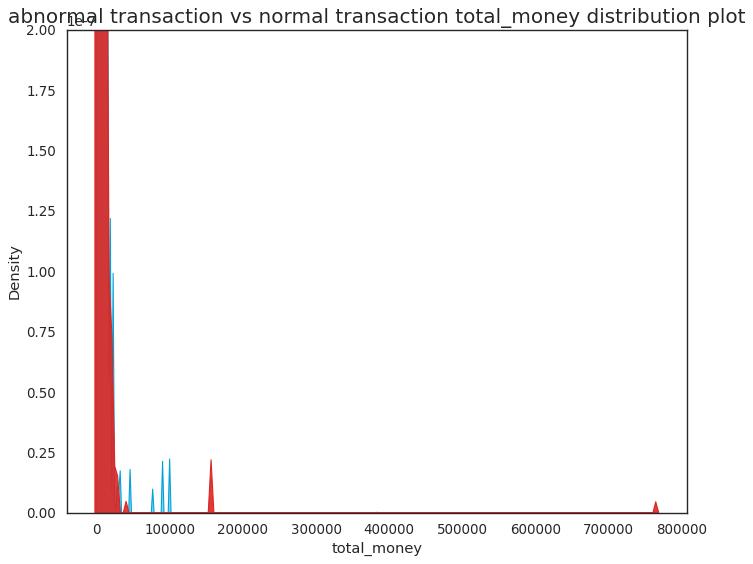

In [295]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(normal,
            shade=True,
            color="#01a2d9",
            label="normal transaction",
            alpha=.5)
sns.kdeplot(ab,
            shade=True,
            color="#dc2624",
            label="abnormal transaction",
            alpha=.9)

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("abnormal transaction vs normal transaction total_money distribution plot",fontsize=18)
#plt.yticks([])
plt.ylim((0,0.0000002))
plt.show()

异常交易在订单金额上的分布有很长的长尾，而普通交易却在38w左右的某个点上形成了小高峰。不难发现**订单金额大于40w的交易全部是异常交易**。在38w之前，异常交易与普通交易的金额看不出显著的区别。我们可以对订单金额进行分箱，并将每个箱内异常交易的比例进行对比。如果各箱之间差异巨大，则我们可以根据分箱后的结果创造新特征。

In [296]:
from sklearn.preprocessing import KBinsDiscretizer as KBD #sklearn中自带的分箱方法

需要从训练集中来学习箱子的边界（上界/下界）

In [297]:
enc = KBD(n_bins=10,encode="ordinal",strategy = 'kmeans') #实例化
#箱子个数10
#encode指的是：一列数据 0-9
#分箱策略：按照样本数量 等等 按照kmeans聚类分箱

In [298]:
enc = enc.fit(pd.DataFrame(train["total_money"]))

In [299]:
train["total_money_split_box"] = enc.transform(pd.DataFrame(train["total_money"]))

In [300]:
train.columns 

Index(['abnormal_label', 'order_id', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'hour', 'minites', 'province',
       'province_abnormal_label', 'catabnormal rate',
       'order_sourceabnormal rate', 'attributionabnormal rate',
       'cat_abnormal_rate', 'order_source_abnormal_rate',
       'attribution_abnormal_rate', 'user_id_ratio', 'pro_id_ratio',
       'pro_brand_ratio', 'total_money_split_box'],
      dtype='object')

In [301]:
train.groupby(["total_money_split_box"])["total_money"].min() #找出每个箱子的下界

total_money_split_box
0.0         0.5
1.0       956.0
2.0      2980.0
3.0      6666.0
4.0     13189.0
5.0     25790.0
6.0     71980.0
7.0    155999.0
8.0    383000.0
9.0    766000.0
Name: total_money, dtype: float64

In [302]:
train.groupby(["total_money_split_box"])["total_money"].max() #找出每个箱子的上界

total_money_split_box
0.0       954.0
1.0      2970.0
2.0      6638.0
3.0     12999.0
4.0     23998.0
5.0     45490.0
6.0     99840.0
7.0    155999.0
8.0    383000.0
9.0    766000.0
Name: total_money, dtype: float64

In [303]:
df = pd.DataFrame(index=train.groupby(["total_money_split_box"])["total_money"].max().index)

df["upper"] = train.groupby(["total_money_split_box"])["total_money"].min()
df["lower"] = train.groupby(["total_money_split_box"])["total_money"].max()

In [304]:
df #从第5个箱子开始，上下界不再是连载一起的了，7、8、9个箱子中都只有唯一的数值

,upper,lower
total_money_split_box,,
0.0,0.5,954.0
1.0,956.0,2970.0
2.0,2980.0,6638.0
3.0,6666.0,12999.0
4.0,13189.0,23998.0
5.0,25790.0,45490.0
6.0,71980.0,99840.0
7.0,155999.0,155999.0
8.0,383000.0,383000.0


In [305]:
train.groupby(["total_money_split_box"])["total_money"].mean()

total_money_split_box
0.0       136.243951
1.0      1775.061962
2.0      4165.485313
3.0      9128.895833
4.0     16872.602041
5.0     32339.400000
6.0     85476.666667
7.0    155999.000000
8.0    383000.000000
9.0    766000.000000
Name: total_money, dtype: float64

我们可以将该数值对应的分箱结果放置到训练集和测试集中去：

In [306]:
train["total_money_split_box"] = enc.transform(pd.DataFrame(train["total_money"]))
test["total_money_split_box"] = enc.transform(pd.DataFrame(test["total_money"]))

In [307]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,catabnormal rate,order_sourceabnormal rate,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box
0,1,4283851335,5,1,13080,199,766000.0,200,1,合并支付,...,0.261565,0.167849,0.294727,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804,9.0
1,1,4281111595,2,1,15075,1856,100.0,100,1,合并支付,...,0.262840,0.167849,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0
2,0,4106833871,3,1,15212,676,8800.0,100,1,合并支付,...,0.235079,0.167849,0.294727,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842,3.0
3,0,4253622967,10,1,11454,1568,880.0,100,1,合并支付,...,0.215029,0.167849,0.294727,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387,0.0
4,0,4276159555,3,0,4800,262,4900.0,100,1,合并支付,...,0.235079,0.167849,0.178732,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739,2.0


同时，还可以将分箱聚合后的平均金额放到训练集和测试集中去：

In [308]:
dic = (train.groupby(["total_money_split_box"])["total_money"].mean()).to_dict()

train["split_box_mean"] = train["total_money_split_box"].map(dic)
test["split_box_mean"] = test["total_money_split_box"].map(dic)

In [309]:
dic = (train.groupby(["total_money_split_box"])["abnormal_label"].mean()).to_dict()

train["split_box_ratio"] = train["total_money_split_box"].map(dic)
test["split_box_ratio"] = test["total_money_split_box"].map(dic)

In [310]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box,split_box_mean,split_box_ratio
0,1,4283851335,5,1,13080,199,766000.0,200,1,合并支付,...,0.294727,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804,9.0,766000.000000,1.000000
1,1,4281111595,2,1,15075,1856,100.0,100,1,合并支付,...,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899
2,0,4106833871,3,1,15212,676,8800.0,100,1,合并支付,...,0.294727,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842,3.0,9128.895833,0.264881
3,0,4253622967,10,1,11454,1568,880.0,100,1,合并支付,...,0.294727,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387,0.0,136.243951,0.203899
4,0,4276159555,3,0,4800,262,4900.0,100,1,合并支付,...,0.178732,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739,2.0,4165.485313,0.326309


In [311]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,attributionabnormal rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box,split_box_mean,split_box_ratio
0,1,4276537082,11,1,12689,1406,19900.0,100,1,合并支付,...,0.294727,0.201848,0.167849,0.294727,-1.000000,0.000000,0.083333,4.0,16872.602041,0.336735
1,0,3977175284,5,1,15601,339,990.0,100,1,合并支付,...,0.294727,0.261565,0.167849,0.294727,-1.000000,0.153846,0.372263,1.0,1775.061962,0.246125
2,0,4245023523,2,1,15075,1856,100.0,100,1,合并支付,...,0.294727,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899
3,0,4284515355,9,1,17252,393,21450.0,50,1,合并支付,...,0.294727,0.193856,0.167849,0.294727,-1.000000,-1.000000,0.162162,4.0,16872.602041,0.336735
4,0,4284735147,3,1,15111,797,1950.0,50,1,合并支付,...,0.294727,0.235079,0.167849,0.294727,-1.000000,0.248485,0.240741,1.0,1775.061962,0.246125


对商品销售数量，我们也可以做同样的操作：

In [313]:
ab = train.loc[train["abnormal_label"] ==1,"total_quantity"]
normal = train.loc[train["abnormal_label"] !=1,"total_quantity"]

findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.


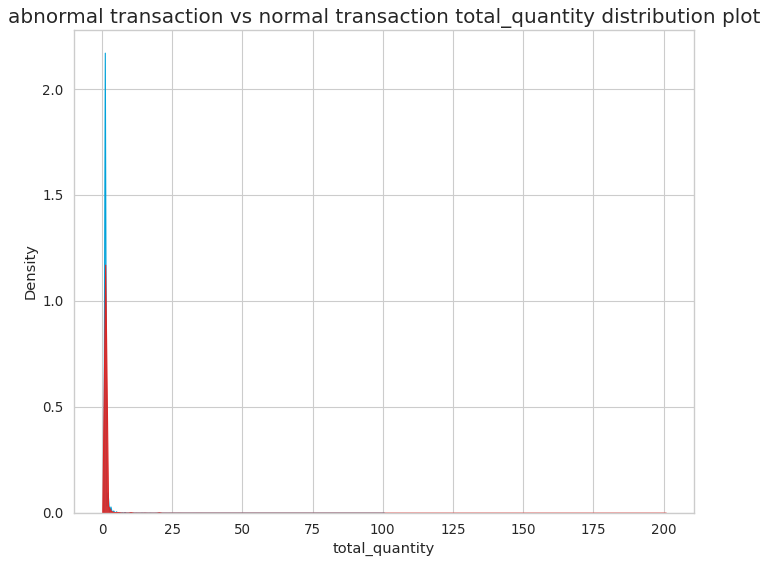

In [314]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(normal,
            shade=True,
            color="#01a2d9",
            label="normal transaction",
            alpha=.5)
sns.kdeplot(ab,
            shade=True,
            color="#dc2624",
            label="abnormal transaction",
            alpha=.9)

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("abnormal transaction vs normal transaction total_quantity distribution plot",fontsize=18)
#plt.yticks([])
#plt.ylim((0,0.0000002))
plt.show()

从分布图来看，一笔交易中下单20个以上商品的多是异常交易，但20个商品以下的交易中，普通交易与异常交易的差异并不明显。从describe的结果来看也是如此，普通交易与异常交易中99%都是一次下单5个商品以下的订单。从这个角度来说，很可能“商品销售数量”这个特征对于模型的预测来说并无帮助。因此，我们对这个特征执行简单二值化操作——销售数量大于25的，是高风险交易，标注为1，反之则是低风险交易，标注为0。

In [315]:
train["total_quantity_split_box"] = 0
test["total_quantity_split_box"] = 0
train.loc[train["total_quantity"] > 25,"total_quantity_split_box"] = 1
test.loc[test["total_quantity"] > 25,"total_quantity_split_box"] = 1

In [316]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box,split_box_mean,split_box_ratio,total_quantity_split_box
0,1,4283851335,5,1,13080,199,766000.0,200,1,合并支付,...,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804,9.0,766000.000000,1.000000,1
1,1,4281111595,2,1,15075,1856,100.0,100,1,合并支付,...,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899,1
2,0,4106833871,3,1,15212,676,8800.0,100,1,合并支付,...,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842,3.0,9128.895833,0.264881,1
3,0,4253622967,10,1,11454,1568,880.0,100,1,合并支付,...,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387,0.0,136.243951,0.203899,1
4,0,4276159555,3,0,4800,262,4900.0,100,1,合并支付,...,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739,2.0,4165.485313,0.326309,1


- 将处理完毕的特征单独保存

In [317]:
train.to_csv(r'data\train.csv')
test.to_csv(r'data\test.csv')

到这里，我们所需对数据做的特征工程与预处理就全部完成了。接下来让我们进入建模流程。

## 七、模型构筑：使用融合模型进行预测

### 1.导入数据，按特征工程后数据进行基础建模

In [123]:
#!pip install xgboost

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import VotingClassifier #投票法的融合
from sklearn.ensemble import GradientBoostingClassifier as GBC #梯度提升树
from sklearn.ensemble import RandomForestClassifier as RFC
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [319]:
train = pd.read_csv(r'data\train.csv',index_col=0)
test = pd.read_csv(r'data\test.csv',index_col=0)

In [320]:
train.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box,split_box_mean,split_box_ratio,total_quantity_split_box
0,1,4283851335,5,1,13080,199,766000.0,200,1,合并支付,...,0.261565,0.167849,0.294727,0.133333,1.000000,0.340804,9.0,766000.000000,1.000000,1
1,1,4281111595,2,1,15075,1856,100.0,100,1,合并支付,...,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899,1
2,0,4106833871,3,1,15212,676,8800.0,100,1,合并支付,...,0.235079,0.167849,0.294727,0.000000,0.238462,0.286842,3.0,9128.895833,0.264881,1
3,0,4253622967,10,1,11454,1568,880.0,100,1,合并支付,...,0.215029,0.167849,0.294727,-1.000000,0.296296,0.298387,0.0,136.243951,0.203899,1
4,0,4276159555,3,0,4800,262,4900.0,100,1,合并支付,...,0.235079,0.167849,0.178732,0.133333,0.119565,0.179739,2.0,4165.485313,0.326309,1


In [321]:
test.head()

,abnormal_label,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,...,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_id_ratio,pro_id_ratio,pro_brand_ratio,total_money_split_box,split_box_mean,split_box_ratio,total_quantity_split_box
0,1,4276537082,11,1,12689,1406,19900.0,100,1,合并支付,...,0.201848,0.167849,0.294727,-1.000000,0.000000,0.083333,4.0,16872.602041,0.336735,1
1,0,3977175284,5,1,15601,339,990.0,100,1,合并支付,...,0.261565,0.167849,0.294727,-1.000000,0.153846,0.372263,1.0,1775.061962,0.246125,1
2,0,4245023523,2,1,15075,1856,100.0,100,1,合并支付,...,0.262840,0.167849,0.294727,0.333333,0.333333,0.250000,0.0,136.243951,0.203899,1
3,0,4284515355,9,1,17252,393,21450.0,50,1,合并支付,...,0.193856,0.167849,0.294727,-1.000000,-1.000000,0.162162,4.0,16872.602041,0.336735,1
4,0,4284735147,3,1,15111,797,1950.0,50,1,合并支付,...,0.235079,0.167849,0.294727,-1.000000,0.248485,0.240741,1.0,1775.061962,0.246125,1


In [271]:
Xtrain = train.iloc[:,1:]
Xtest = test.iloc[:,1:]
Ytrain = train.iloc[:,0]
Ytest = test.iloc[:,0]

In [272]:
Xtrain.head()

,订单ID,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,...,商品一级类别异常率,商品所属渠道异常率,订单渠道异常率,金额分箱,分箱均值,分箱异常率,销量分箱,用户异常率,商品异常率,品牌异常率
0,4283851335,5,1,13080,199,766000.0,200,1,0,18575,...,0.261565,0.294727,0.167849,9.0,766000.000000,1.000000,1,0.133333,1.000000,0.340804
1,4281111595,2,1,15075,1856,100.0,100,1,0,34757,...,0.262840,0.294727,0.167849,0.0,136.243951,0.203899,1,0.333333,0.333333,0.250000
2,4106833871,3,1,15212,676,8800.0,100,1,0,42323,...,0.235079,0.294727,0.167849,3.0,9128.895833,0.264881,1,0.000000,0.238462,0.286842
3,4253622967,10,1,11454,1568,880.0,100,1,0,15730,...,0.215029,0.294727,0.167849,0.0,136.243951,0.203899,1,-1.000000,0.296296,0.298387
4,4276159555,3,0,4800,262,4900.0,100,1,0,18575,...,0.235079,0.178732,0.167849,2.0,4165.485313,0.326309,1,0.133333,0.119565,0.179739


In [273]:
dtrain = xgb.DMatrix(Xtrain,Ytrain) #xgb专用数据集
dtest = xgb.DMatrix(Xtest,Ytest)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [275]:
#使用随机森林与GBDC分别进行预测观察结果

In [276]:
rf = RFC(n_estimators=200,random_state=1412)
gbdc = GBC(n_estimators=200,random_state=1412)

In [277]:
#依然使用和建立benchmark时一模一样的最简单的KFold交叉验证，随机数种子也保持一致
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [278]:
###====【TIME WARNING：2mins】====###
result_gbdc_cv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv)

In [280]:
result_gbdc_cv.mean() #准确率

0.8796969580761204

In [281]:
result_gbdc_cv.var()

1.5122772346016216e-06

In [282]:
###====【TIME WARNING：2mins】====###
result_rf_cv = cross_val_score(rf,Xtrain,Ytrain,cv=cv)

In [283]:
result_rf_cv.mean()

0.8751143080783133

In [284]:
result_rf_cv.var()

2.7573922468287844e-07

In [88]:
#使用XGBoost观察结果

In [285]:
param = {"objective":'binary:logistic' #交叉熵损失：二分类-逻辑回归
         ,"eval_metric": "error" #评估指标：错误率 1-错误率=准确率
         ,"seed":1412}

In [286]:
xgbcv = xgb.cv(param, dtrain
                  , num_boost_round=200 #xgboost中的树
                  , nfold=5, seed=1412, shuffle=True) #5折交叉验证
#xgboost使用的随机性系统与sklearn使用的随机性系统不同
#在相同的随机树种子下，交叉验证所划分的数据集是不用的

In [288]:
xgbcv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.125560,0.000901,0.127161,0.001774
1,0.123054,0.000910,0.124799,0.001228
2,0.122368,0.000814,0.124080,0.000671
3,0.121359,0.000337,0.123645,0.001491
4,0.120858,0.000701,0.123329,0.001151
...,...,...,...,...
195,0.064141,0.000750,0.123536,0.000990
196,0.064002,0.000717,0.123699,0.001053
197,0.063901,0.000687,0.123775,0.000959
198,0.063787,0.000653,0.123721,0.000977


In [287]:
1 - xgbcv.loc[199,"test-error-mean"] #准确率

0.8763008

可以看到，比起benchmark的平均准确率81.58.9%，方差7.58\*10^6，现在的模型无论是准确率均值还是方差都得到了极大的提升。现在我们再观察三个模型的AUC分数如何：

In [289]:
#注意，每次训练完毕之后需要重新设置类，否则会在原来的基础上继续训练
rf = RFC(n_estimators=200,random_state=1412)
gbdc = GBC(n_estimators=200,random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [290]:
###====【TIME WARNING：2mins】====###
result_gbdc_cv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")

In [291]:
result_gbdc_cv.mean()

0.9351126430049097

In [292]:
result_gbdc_cv.var()

5.305633730837464e-07

In [293]:
###====【TIME WARNING：2mins】====###
result_rf_cv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")

In [294]:
result_rf_cv.mean()

0.9282352135656886

In [295]:
result_rf_cv.var()

1.2647793872313895e-06

In [296]:
param2 = {"objective":'binary:logistic'
         ,"eval_metric": "auc"
         ,"seed":1412}

In [297]:
xgbcv = xgb.cv(param2, dtrain
                  , num_boost_round=200 #xgboost中的树
                  , nfold=5, seed=1412, shuffle=True)

In [298]:
xgbcv.loc[199,"test-auc-mean"]

0.9331374

In [299]:
xgbcv.loc[199,"test-auc-std"]**2 #标准差*2=方差

2.4589664000002926e-07

同样，benchmark的平均AUC为0.83，方差8.94\*10^6，现在三个模型的AUC分数也得到了大幅提升，方差也变小了8~10倍，可见特征工程是成功的。现在，基于我们目前的水平，我们可以在此基础上继续调参，来观察模型的结果。

### 2.依照AUC，使用学习曲线进行调参

- 样本不均衡

|算法|默认参数|特征工程|
|----|--------|-------|
|rf|0.82931|0.92811(<font color=green>**+**</font>)|
|gbc|-|0.93519(<font color=green>**+**</font>)|
|xgb|-|0.93348(<font color=green>**+**</font>)|

当我们使用集成模型进行建模时，我们必须知道调参的空间是比较有限的。**集成模型的默认参数都是基于经验精心设计的，当我们使用默认参数时，模型就已经达到了某种上限，因此调参在集成模型上基本是对结果进行“微调”，集成模型调参之后的表现不会与默认参数的表现差距太大**。因此，为了大幅度提升模型的效果，我们需要先考虑一些激进的方案。

对于一个不均衡的样本来说，处理样本不均衡问题往往能够大幅度提升模型auc和准确率。但现在的状况是，森林、GBDT和XGB的结果看起来高度相似，这暗示样本不均衡的处理可能对模型效果不佳。理由是因为，XGBoost的默认参数中默认会将正负样本比例修正为1:1，而随机森林和GBDT则不会做出这样的修正，在这种情况下，三个模型在AUC上的表现看起来高度相似，就说明样本不均衡对于现在的数据集来说可能不是问题。

然而无论如何，我们愿意去做出尝试。为了业务上能够有所解释，我们尽量避免使用smote方法，但遗憾的是，GBDT没有修复样本不均衡的参数，因此GBDT无法在这个点上进行调整，我们先来看看xgboost和随机森林的效果。

In [104]:
(Ytrain==1).sum()/Ytrain.shape[0] #问题并不严重，但我们可以尝试一下

0.2167784212130448

对随机森林来说，我们可以试着调用参数class_weight。在class_weight中输入{类别1:占比，类别2:占比}就可以设定训练中两个标签类别的比例，或者使用"balance"模式。默认参数中，class_weight是None，也就是完全不理会样本不均衡情况。

在"balanced"模式下，0的比例为样本量/(类别量\*标签中为0的样本量)，1的比例为样本量/(类别量\*标签中为1的样本量)。

In [300]:
Xtrain.shape[0]/(2*np.bincount(Ytrain)) #0类占比是0.63 1类占比是2.3 约等于1:3

array([0.63838895, 2.30650264])

In [ ]:
{0:0.5,1:0.5}, #0类占比0.5,1类占比0.5 1：1
{0:0.5,1:1}, # 1:2
"balanced", # 1:3
{0:0.5,1:2}, #1:4
{0:0.5,1:2.5} #1:5

In [301]:
for weights in [{0:0.5,1:0.5},{0:0.5,1:1},"balanced",{0:0.5,1:2},{0:0.5,1:2.5}]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=200,random_state=1412,class_weight=weights)
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    
    print(weights)
    print("\t rf_mean:{:.5f}".format(rfcv.mean()))
    print("\t rf_var:{}".format(rfcv.var()))

{0: 0.5, 1: 0.5}
	 rf_mean:0.92824
	 rf_var:1.2647793872313895e-06
{0: 0.5, 1: 1}
	 rf_mean:0.92876
	 rf_var:2.1998120043593288e-06
balanced
	 rf_mean:0.92907
	 rf_var:1.8636990794196675e-06
{0: 0.5, 1: 2}
	 rf_mean:0.92902
	 rf_var:1.985134028818673e-06
{0: 0.5, 1: 2.5}
	 rf_mean:0.92893
	 rf_var:1.4800909926384316e-06


可以看到，class_weight的调整只是对随机森林的结果造成了微弱的影响。随着少数类比例的增加，AUC分数先有一个上升，后有所下降，这说明auc最高的0.5:2大约就是最好的比例。我们暂定对随机森林的class_weight使用0.5:2，如果我们想，我们还可以针对这个比例进行更细致的调参。

来看XGBoost。对XGBoost来说，我们可以使用参数scale_pos_weight，在这个参数中我们需要输入多数类比少数类的比例（sum(negative instances) / sum(positive instances)）。默认的参数值是1，因此XGBoost默认就对不均衡样本做出了处理。我们可以先尝试0.5,0.3,0.1三种选项。

In [302]:
for weights in [0.5,0.3,0.1]:
    num_round=200
    param = {"objective":'binary:logistic',"eval_metric": "auc","scale_pos_weight": weights}
    xgbcv = xgb.cv(param, dtrain, num_boost_round=num_round, nfold=5, seed=1412, shuffle=True)
    
    print(weights)
    print("\t xgb_mean:{:.5f}".format(xgbcv.loc[num_round-1,"test-auc-mean"]))
    print("\t xgb_std:{}".format((xgbcv.loc[num_round-1,"test-auc-std"])**2)) #同样不规定显示方式，就按科学计数法走

0.5
	 xgb_mean:0.93368
	 xgb_std:5.317817600000257e-07
0.3
	 xgb_mean:0.93360
	 xgb_std:8.638346399999687e-07
0.1
	 xgb_mean:0.93457
	 xgb_std:7.589201599999972e-07


从结果来看，调整scale_pos_weight参数是有效的，随着正样本比例越来越大、负样本比例越来越小，模型的auc是上升的，我们可以尝试更激进的方案：

In [303]:
for weights in [0.05,0.03,0.01]:
    num_round=200
    param = {"objective":'binary:logistic',"eval_metric": "auc","scale_pos_weight": weights}
    xgbcv = xgb.cv(param, dtrain, num_boost_round=num_round, nfold=5, seed=1412, shuffle=True)
    
    print(weights)
    print("\t xgb_mean:{:.5f}".format(xgbcv.loc[num_round-1,"test-auc-mean"]))
    print("\t xgb_std:{}".format((xgbcv.loc[num_round-1,"test-auc-std"])**2)) #同样不规定显示方式，就按科学计数法走

0.05
	 xgb_mean:0.93486
	 xgb_std:4.52779439999976e-07
0.03
	 xgb_mean:0.93521
	 xgb_std:8.993842400000433e-07
0.01
	 xgb_mean:0.93503
	 xgb_std:1.4052709600000273e-06


可以看到，均值最高的大约是0.03，也就是负样本：正样本比例为3:100时，xgboost的auc是最高的。我们还可以就0.03附近的值进行更精确的调参，但现在我们暂定scale_pos_weight的比例为0.03。现在模型参数如下：

In [304]:
rf = RFC(n_estimators=200,random_state=1412,class_weight="balanced")
gbdc = GBC(n_estimators=200,random_state=1412)

param = {"objective":'binary:logistic',"eval_metric": "auc","scale_pos_weight": 0.03}
#xgbcv = xgb.cv(param, dtrain, num_boost_round=200, nfold=5, seed=1412, shuffle=True)

- 树的数量

|算法|benchmark|特征工程|样本均衡|
|----|--------|-------|----------------|
|rf|0.82931|0.92823(<font color=green>**+**</font>)|0.92907(<font color=green>**+**</font>)|
|gbc|-|0.93511(<font color=green>**+**</font>)|-|
|xgb|-|0.93313(<font color=green>**+**</font>)|0.93521(<font color=green>**+**</font>)|

如果class_weight不能够帮助我们大幅度提升模型的效果，那我们接下来能够依赖的就是**树的数量与学习率**了，树的数量往往可以提升模型的上限，而学习率是为数不多的、可能实现模型效果大幅度提升的参数之一。为此，我们可以在三个算法上尝试不同的树的数量，来观察模型的变化。

- 如果树的数量越多，模型效果越好，则说明模型还有提升的空间
- 如果树的数量变多，模型效果却没有明显提升，则说明模型已经达到了上限，我们或许可以以更少的数来达到和现在一样的效果

In [305]:
#===【TIME WARNING：10mins】===#
for num_round in [25,50,100,200]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    
    rf = RFC(n_estimators=num_round,random_state=1412,class_weight="balanced")
    gbdc = GBC(n_estimators=num_round,random_state=1412)
    param = {"objective":'binary:logistic',"eval_metric": "auc","scale_pos_weight": 0.03}
    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    xgbcv = xgb.cv(param, dtrain, num_boost_round=num_round, nfold=5, seed=1412, shuffle=True)
    
    print(num_round)
    print("\t rf:{:.5f}".format(rfcv.mean()))
    print("\t gbd:{:.5f}".format(gbdcv.mean()))
    print("\t xgb:{:.5f}".format(xgbcv.loc[num_round-1,"test-auc-mean"]))

25
	 rf:0.92105
	 gbd:0.92294
	 xgb:0.93432
50
	 rf:0.92574
	 gbd:0.92930
	 xgb:0.93614
100
	 rf:0.92816
	 gbd:0.93333
	 xgb:0.93620
200
	 rf:0.92907
	 gbd:0.93511
	 xgb:0.93521


对xgboost来说，大约100棵树的状态是最理想的，而对随机森林和GBDT来说，随着树的数量增长，交叉验证中的auc分数还在增长。我们可以对xgboost进行50-150之间的精密调参，而对森林与gbdt继续增加树的数量。

In [306]:
#===【TIME WARNING：3mins】===#
for num_round in range(50,150,5):
    param = {"objective":'binary:logistic',"eval_metric": "auc","scale_pos_weight": 0.03}
    xgbcv = xgb.cv(param, dtrain, num_boost_round=num_round, nfold=5, seed=1412, shuffle=True)
    test_auc = xgbcv.loc[num_round-1,"test-auc-mean"]
    print(num_round,"xgb:{:.5f}".format(test_auc))

50 xgb:0.93614
55 xgb:0.93619
60 xgb:0.93622
65 xgb:0.93630
70 xgb:0.93633
75 xgb:0.93629
80 xgb:0.93628
85 xgb:0.93628
90 xgb:0.93628
95 xgb:0.93623
100 xgb:0.93620
105 xgb:0.93618
110 xgb:0.93616
115 xgb:0.93606
120 xgb:0.93602
125 xgb:0.93601
130 xgb:0.93605
135 xgb:0.93602
140 xgb:0.93599
145 xgb:0.93592


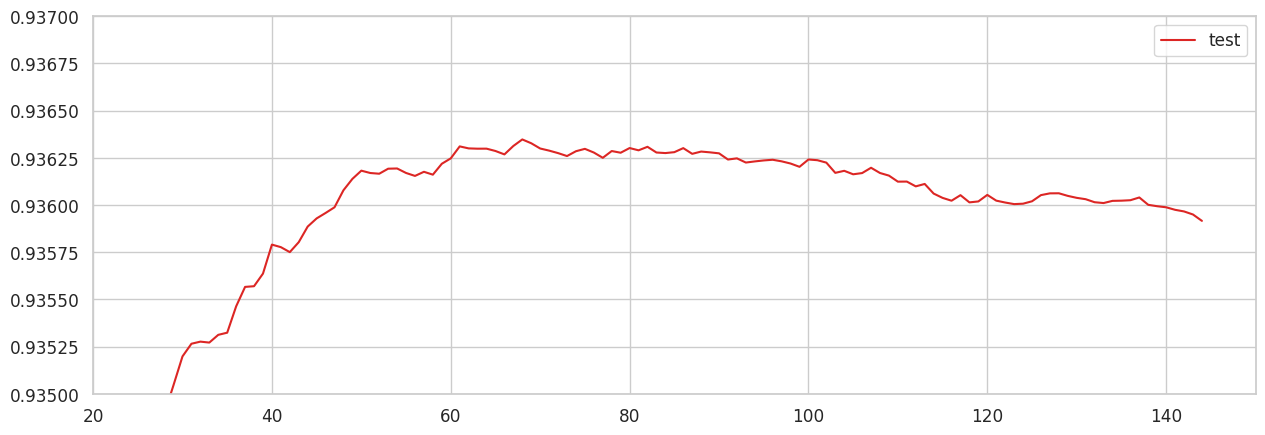

In [308]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(xgbcv.index,xgbcv["test-auc-mean"],c="#dc2624",label="test")
plt.plot(xgbcv.index,xgbcv["test-auc-mean"]+xgbcv["test-auc-std"]*5,c="pink",linestyle="dotted")
plt.plot(xgbcv.index,xgbcv["test-auc-mean"]-xgbcv["test-auc-std"]*5,c="pink",linestyle="dotted")

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.legend()
plt.ylim((0.935,0.937))
plt.xlim((20,150))
plt.show()

可以发现，最高AUC出现在70棵树时，AUC达到了93.633。**对XGBoost，我们可以确定参数num_boost_round=70**。

In [312]:
#===【TIME WARNING：15mins】===#
for num_round in [300,400,500,1000]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    
    rf = RFC(n_estimators=num_round,random_state=1412,class_weight="balanced")
    gbdc = GBC(n_estimators=num_round,random_state=1412)
    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    
    print(num_round)
    print("\t rf:{:.5f}".format(rfcv.mean()))
    print("\t gbd:{:.5f}".format(gbdcv.mean()))

300
	 rf:0.92935
	 gbd:0.93602
400
	 rf:0.92945
	 gbd:0.93635
500
	 rf:0.92957
	 gbd:0.93652
1000
	 rf:0.92966
	 gbd:0.93662


不难发现，森林与GBDT的结果随着树的数量上升、持续增长中，这说明模型还有潜力，如果我们有足够的算力支持足够多的树，那两个算法的AUC还可以上升。但在PC上运行时，1000棵树已经非常非常多了，再增加树的数量会增加太多运算时间和运算成本，因此我们可以考虑换一种思路来让模型更快地提升分数。

- 对于GBDT来说，我们可以调整学习率，让树迭代得更快，以此来尝试减少树的数量
- 对于森林来说，我们可以从对抗过拟合的角度来考虑，降低每棵树的复杂度，虽然树的数量很多，但是尽量加快建树的速度

**基于这样的结论，GBDT的树数量暂时还是定位200，森林的树数量暂定为1000**。

接下来我们来调整学习率。

- 学习率

|算法|benchmark|特征工程|样本均衡|
|----|--------|-------|----------------|
|rf|0.82931|0.92823(<font color=green>**+**</font>)|0.92907(<font color=green>**+**</font>)|
|gbc|-|0.93511(<font color=green>**+**</font>)|-|
|xgb|-|0.93313(<font color=green>**+**</font>)|0.93521(<font color=green>**+**</font>)|

|算法|benchmark|特征工程|样本均衡|树的数量|
|----|--------|-------|----------------|-------|
|rf|0.82931|0.92823(<font color=green>**+**</font>)|0.92907(<font color=green>**+**</font>)|0.92966(<font color=green>**+**</font>)|
|gbc|-|0.93511(<font color=green>**+**</font>)|-|-|
|xgb|-|0.93313(<font color=green>**+**</font>)|0.93521(<font color=green>**+**</font>)|0.93633(<font color=green>**+**</font>)|

当调整样本均衡问题的class_weight与调整树数量的参数都不管用时，学习率是最后一个有可能大幅度提升模型表现的参数。随机森林没有学习率调整的参数，因此我们只能另想办法，但XGBoost与GBDT的学习率都是可以调整的，其中GBDT的参数是learning_rate（默认0.1），XGBoost的参数是eta（默认0.3）。对这两个算法，我们可以尝试将学习率的取值向两边拓展：

In [313]:
#===【TIME WARNING：5mins】===#
for lr in [0.05,0.1,0.3,0.5]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
               ,learning_rate=lr
               ,random_state=1412)
    param = {"objective":'binary:logistic',"eval_metric": "auc"
             ,"scale_pos_weight": 0.03
             ,"eta":lr}
    
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    xgbcv = xgb.cv(param, dtrain, num_boost_round=70, nfold=5, seed=1412, shuffle=True)
    test_auc = xgbcv.loc[69,"test-auc-mean"]
    
    print(lr)
    print("\t gbd:{:.5f}".format(gbdcv.mean()))
    print("\t xgb:{:.5f}".format(test_auc))

0.05
	 gbd:0.93331
	 xgb:0.92413
0.1
	 gbd:0.93511
	 xgb:0.93437
0.3
	 gbd:0.93576
	 xgb:0.93633
0.5
	 gbd:0.93439
	 xgb:0.93493


对GBDT来说，将学习率从0.1增加到0.3，能够一定程度上提升模型的效果，但对XGB来说，似乎没有比0.3更适合的数字了。因此我们可以尝试在0.3周围小范围进行调整：

In [ ]:
range() #只能作用于整数
np.arange(0,1,step=0.02) #可以作用于小数，每个间隔都是一致的
np.linespace(0,1,num=50) #可以作用于小数，开头和结尾之间分布相对均匀的一系列随机数

In [314]:
#===【TIME WARNING：30mins】===#
gbdc_result = []
xgb_result = []
for lr in np.linspace(0.25,0.35,10):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
               ,learning_rate=lr
               ,random_state=1412)
    param = {"objective":'binary:logistic',"eval_metric": "auc"
             ,"scale_pos_weight": 0.03
             ,"eta":lr}
    
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    xgbcv = xgb.cv(param, dtrain, num_boost_round=70, nfold=5, seed=1412, shuffle=True)
    test_auc = xgbcv.loc[69,"test-auc-mean"]
    
    gbdc_result.append(gbdcv.mean())
    xgb_result.append(test_auc)

GBDC最高分是0.93629，最高分对应的学习率是0.2611111111111111
XGB最高分是0.93661，最高分对应的学习率是0.25


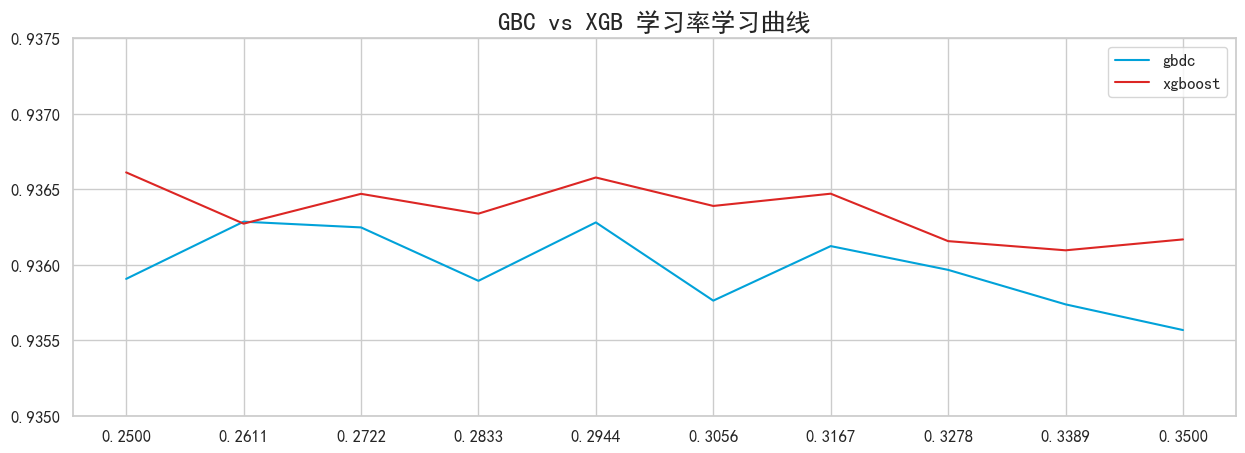

In [33]:
lr_range = np.linspace(0.25,0.35,10)
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(lr_range,gbdc_result,c="#01a2d9",label="gbdc")
plt.plot(lr_range,xgb_result,c="#dc2624",label="xgboost")
print("GBDC最高分是{:.5f}，最高分对应的学习率是{}".format(max(gbdc_result),lr_range[gbdc_result.index(max(gbdc_result))]))
print("XGB最高分是{:.5f}，最高分对应的学习率是{}".format(max(xgb_result),lr_range[xgb_result.index(max(xgb_result))]))

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("GBC vs XGB 学习率学习曲线",fontsize=18)
plt.legend()
plt.xticks(lr_range)
plt.ylim((0.935,0.9375))
plt.show()

In [34]:
#===【TIME WARNING：30mins】===#
gbdc_result2 = []
xgb_result2 = []
for lr in np.linspace(0.235,0.265,10):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=200
               ,learning_rate=lr
               ,random_state=1412)
    param = {"objective":'binary:logistic',"eval_metric": "auc"
             ,"scale_pos_weight": 0.03
             ,"eta":lr}
    
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    xgbcv = xgb.cv(param, dtrain, num_boost_round=70, nfold=5, seed=1412, shuffle=True)
    test_auc = xgbcv.loc[69,"test-auc-mean"]
    
    gbdc_result2.append(gbdcv.mean())
    xgb_result2.append(test_auc)

GBDC最高分是0.93638，最高分对应的学习率是0.26166666666666666
XGB最高分是0.93661，最高分对应的学习率是0.24166666666666667


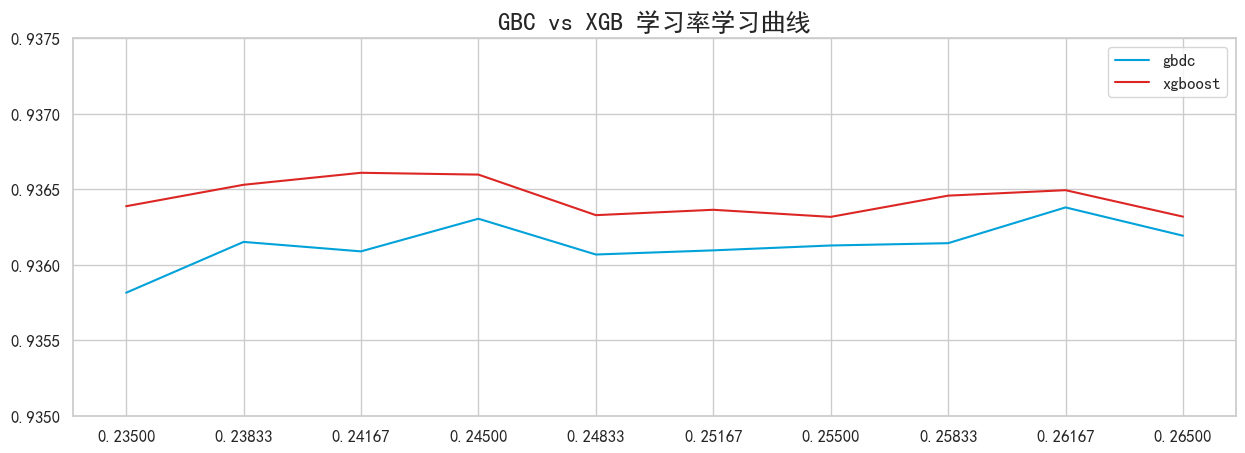

In [35]:
lr_range = np.linspace(0.235,0.265,10)
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(lr_range,gbdc_result2,c="#01a2d9",label="gbdc")
plt.plot(lr_range,xgb_result2,c="#dc2624",label="xgboost")
print("GBDC最高分是{:.5f}，最高分对应的学习率是{}".format(max(gbdc_result2),lr_range[gbdc_result2.index(max(gbdc_result2))]))
print("XGB最高分是{:.5f}，最高分对应的学习率是{}".format(max(xgb_result2),lr_range[xgb_result2.index(max(xgb_result2))]))

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("GBC vs XGB 学习率学习曲线",fontsize=18)
plt.legend()
plt.xticks(lr_range)
plt.ylim((0.935,0.9375))
plt.show()

**在这里，可以确认下GBDC的学习率是0.26166，XGB的学习率是0.24166**。考虑到现在有了新的学习率，我们可以基于学习率的结果，再次尝试调整GBDC的树的数量，看看是否能够保证较高的AUC。

In [38]:
#===【TIME WARNING：20mins】===#
gbdc_result = []
for num_round in [25,50,100,150,200,250]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    gbdc = GBC(n_estimators=num_round,learning_rate=0.26166,random_state=1412)
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    gbdc_result.append(gbdcv.mean())

GBDC最高分是0.93639，最高分对应的树数量是200


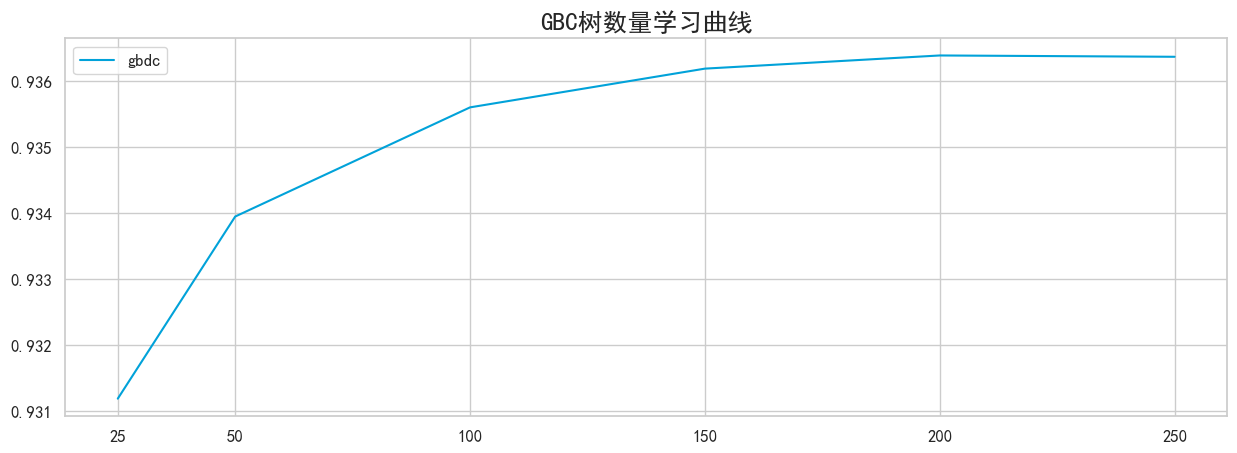

In [45]:
num_round = [25,50,100,150,200,250]
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(num_round,gbdc_result,c="#01a2d9",label="gbdc")
print("GBDC最高分是{:.5f}，最高分对应的树数量是{}".format(max(gbdc_result),num_round[gbdc_result.index(max(gbdc_result))]))

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("GBC树数量学习曲线",fontsize=18)
plt.legend()
plt.xticks(num_round)
plt.show()

从结果来看，一旦减少树的数量，GBDT的结果就会下降，但增加树的数量又会增加计算量，因此我们就将GBDT的树数量保留为200，不再变化。

- 对抗过拟合

|算法|benchmark|特征工程|样本均衡|树的数量|学习率|
|----|--------|-------|----------------|-------|-------|
|rf|0.82931|0.92811(<font color=green>**+**</font>)|0.92916(<font color=green>**+**</font>)|0.92976(<font color=green>**+**</font>)|-|
|gbc|-|0.93519(<font color=green>**+**</font>)|-|-|0.93639(<font color=green>**+**</font>)|
|xgb|-|0.93348(<font color=green>**+**</font>)|0.93349(<font color=green>**+**</font>)|0.93644(<font color=green>**+**</font>)|0.93661(<font color=green>**+**</font>)|

In [47]:
rf = RFC(n_estimators=1000
         ,random_state=1412
         ,class_weight={0:0.5,1:2})
gbdc = GBC(n_estimators=200
           ,learning_rate=0.26166
           ,random_state=1412)

param = {"objective":'binary:logistic'
         ,"eval_metric": "auc"
         ,"eta":0.24166
         ,"scale_pos_weight": 0.03}
xgbcv = xgb.cv(param, dtrain, num_boost_round=70, nfold=5, seed=1412, shuffle=True)

在调整了数个参数之后，我们开始研究树模型的过拟合问题。xgboost的交叉验证功能支持我们提取出训练集与测试集的差异，进行绘图。

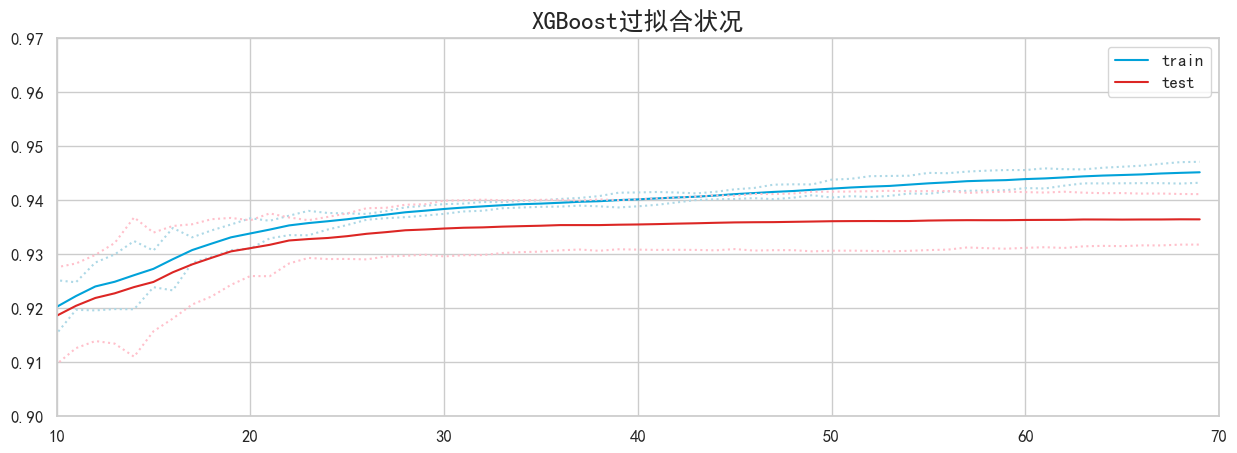

In [50]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(xgbcv.index,xgbcv["train-auc-mean"],c="#01a2d9",label="train")
plt.plot(xgbcv.index,xgbcv["train-auc-mean"]+xgbcv["train-auc-std"]*5,c="lightblue",linestyle="dotted")
plt.plot(xgbcv.index,xgbcv["train-auc-mean"]-xgbcv["train-auc-std"]*5,c="lightblue",linestyle="dotted")
plt.plot(xgbcv.index,xgbcv["test-auc-mean"],c="#dc2624",label="test")
plt.plot(xgbcv.index,xgbcv["test-auc-mean"]+xgbcv["test-auc-std"]*5,c="pink",linestyle="dotted")
plt.plot(xgbcv.index,xgbcv["test-auc-mean"]-xgbcv["test-auc-std"]*5,c="pink",linestyle="dotted")

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("XGBoost过拟合状况",fontsize=18)
plt.legend()
plt.xlim(10,70)
plt.ylim((0.9,0.97))
plt.show()

从结果来看，xgboost上的过拟合不是特别严重，这与我们将xgboost的树数量调整为70有很大的关系，同时xgboost的默认参数也是偏向于天生控制过拟合耳朵（例如，max_depth=6），因此xgboost在抑制过拟合后得到好结果的可能性就非常小了。

sklearn中的交叉验证并不能调出训练集的结果，因此我们无法判断随机森林与GBDT是否处于过拟合的状态，但从树的数量来看，应该是比xgboost有更大的空间的。我们可以尝试控制过拟合来提升模型的泛化能力。

在树模型的参数中，大量的参数都是用来对抗过拟合的，这与树模型天生学习能力较强、很容易的过拟合的性质有关。在对抗过拟合的参数中，最有效的是max_depth，如果max_depth展现出一定的效果，我们可以继续调节其他控制过拟合的参数，如果max_depth完全无效、甚至让模型效果变弱，那说明现在调整过拟合可能不是一个很好的选择。

在GBDT的默认参数中，max_depth=3，因此GBDT本身应该就带有一些抗过拟合的性质。随机森林的max_depth默认值为None，因此理论上来说森林的树应该比GBDT的树要深很多。我们可以尝试调小max_depth，来观察模型的效果：

In [55]:
#===【TIME WARNING：40mins】===#
for max_depth in [5,10,15,20,25,30]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    
    rf = RFC(n_estimators=1000,max_depth=max_depth,random_state=1412,class_weight={0:0.5,1:2})
    gbdc = GBC(n_estimators=200,max_depth=max_depth,learning_rate=0.26166,random_state=1412)
    param = {"objective":'binary:logistic',"eval_metric": "auc","max_depth" : max_depth
             ,"eta":0.24166,"scale_pos_weight": 0.03}
    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    gbdcv = cross_val_score(gbdc,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    xgbcv = xgb.cv(param, dtrain, num_boost_round=70, nfold=5, seed=1412, shuffle=True)
    test_auc = xgbcv.loc[69,"test-auc-mean"]
    
    print(max_depth)
    print("\t rf:{:.5f}".format(rfcv.mean()))
    print("\t gbd:{:.5f}".format(gbdcv.mean()))
    print("\t xgb:{:.5f}".format(test_auc))

5
	 rf:0.90879
	 gbd:0.93513
	 xgb:0.93588
10
	 rf:0.93096
	 gbd:0.92806
	 xgb:0.93658
15
	 rf:0.93278
	 gbd:0.92643
	 xgb:0.93570
20
	 rf:0.93083
	 gbd:0.92603
	 xgb:0.93556
25
	 rf:0.93025
	 gbd:0.92617
	 xgb:0.93514
30
	 rf:0.92987
	 gbd:0.92007
	 xgb:0.93496


不难发现，在max_depth非常小的时候，随机森林的低于了90%，但是当max_depth达到10的时候，森林的AUC首次冲上了93的高峰，这说明森林的确存在过拟合的情况，并且使用max_depth可以很好地控制过拟合、提升模型效果。

相对的，GBDT与XGBoost在改变max_depth之后都没有取得比之前更高的结果。当然，对GBDT我们可以在默认值3的周围进行精密的调参，对XGBoost我们可以在6的周围进行精细的调参，但在这两个算法的效果都高于森林的情况下，我们可以以提升森林的效果为主，这样之后在进行模型融合时才能够提升融合模型的综合水平。

现在我们对随机森林的max_depth进行更加精细的调整，看看能否得到更好的结果。

In [9]:
#===【TIME WARNING：1hour10mins】===#
result = []
for max_depth in range(10,21):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=1000,max_depth=max_depth,random_state=1412,class_weight={0:0.5,1:2})    
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    result.append(rfcv.mean())

RF最高分是0.93341，最高分对应的max_depth是13


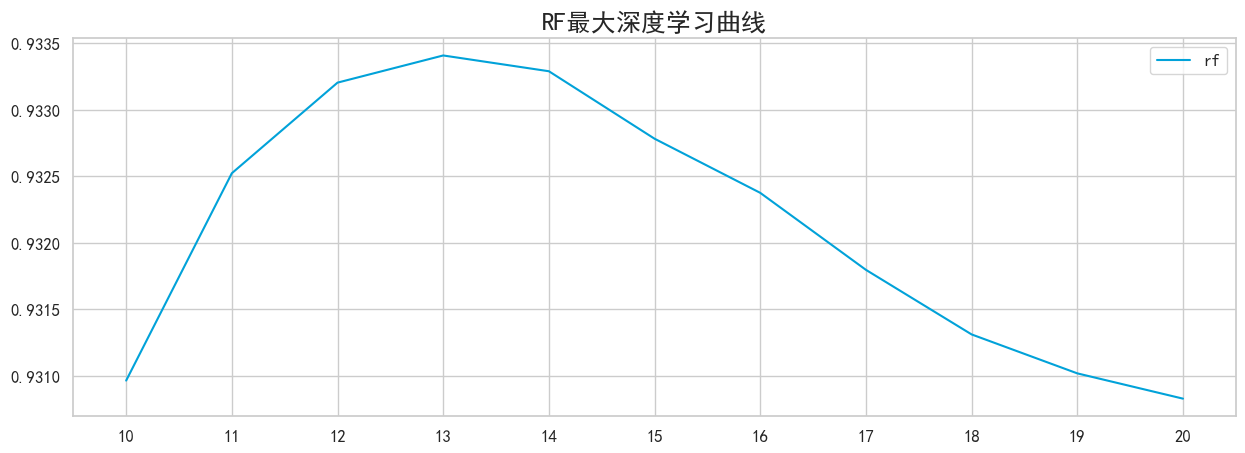

In [11]:
max_depth = range(10,21)
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(max_depth,result,c="#01a2d9",label="rf")
print("RF最高分是{:.5f}，最高分对应的max_depth是{}".format(max(result),max_depth[result.index(max(result))]))

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("RF最大深度学习曲线",fontsize=18)
plt.legend()
plt.xticks(max_depth)
plt.show()

可见，最大深度为13时模型的效果最好，并且达到了0.93341。在全新的抑制过拟合参数状况下，我们再尝试能否让随机森林的树的数量降低：

In [18]:
#===【TIME WARNING：10mins】===#
rf_result = []
for num_round in [100,200,300,400,500]:
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    rf = RFC(n_estimators=num_round,max_depth=13,random_state=1412,class_weight={0:0.5,1:2})
    rfcv = cross_val_score(rf,Xtrain,Ytrain,cv=cv,scoring="roc_auc")
    rf_result.append(rfcv.mean())

随机森林最高分是0.93337，最高分对应的树数量是500


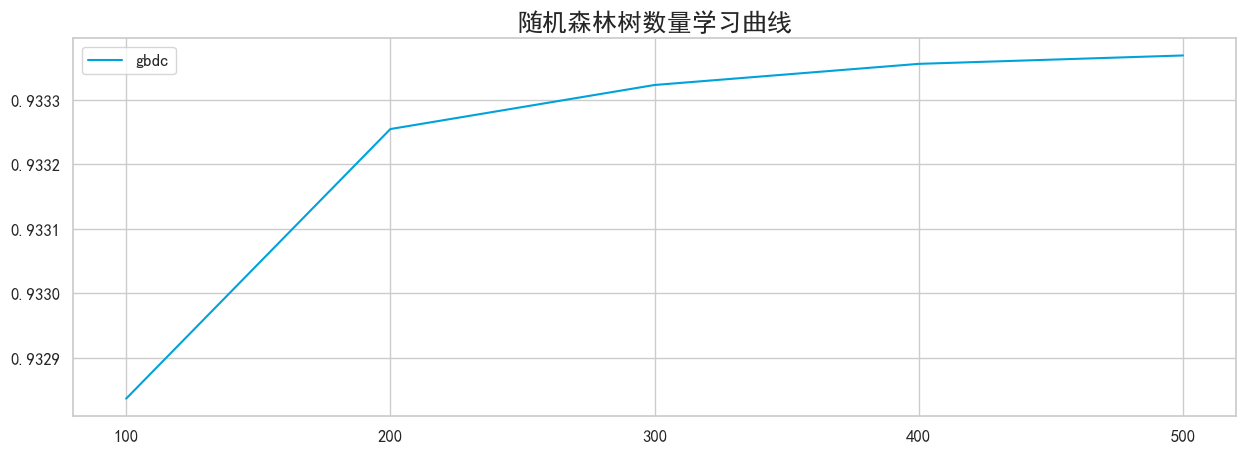

In [19]:
num_round = [100,200,300,400,500]
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(num_round,rf_result,c="#01a2d9",label="gbdc")
print("随机森林最高分是{:.5f}，最高分对应的树数量是{}".format(max(rf_result),num_round[rf_result.index(max(rf_result))]))

#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("随机森林树数量学习曲线",fontsize=18)
plt.legend()
plt.xticks(num_round)
plt.show()

可见，虽然我们限制了过拟合，但并没有改变随机森林的结果随着树的数量增多持续上升的情况，不过500棵树时的93.337这个auc分数已经很高，即便我们将树的数量增加到1000，也只能在auc上提升0.004。从计算效率和模型效果综合角度来考虑，我们可以选择更少的树的数量。**最终决定将随机森林的树数量降低至1000棵树**。

对随机森林而言，我们可以持续调整更多关于控制过拟合的参数，例如max_features、min_samples_split，但考虑到我们之后需要对模型进行融合，我们不再进行更精密的调参，但我们必须知道，模型还有更多的可能性。最终我们调参后得到的结果如下：

|  |benchmark|feature engineering|sample balance|tree amount|learning rate|control overfitting|
|----|--------|-------|---------|-------|-------|-------|
|rf|0.82931|0.92811(<font color=green>**+**</font>)|0.92916(<font color=green>**+**</font>)|0.92976(<font color=green>**+**</font>)|-|0.93341(<font color=green>**+**</font>)|
|gbc|-|0.93519(<font color=green>**+**</font>)|-|-|0.93639(<font color=green>**+**</font>)|-|
|xgb|-|0.93348(<font color=green>**+**</font>)|0.93349(<font color=green>**+**</font>)|0.93644(<font color=green>**+**</font>)|0.93661(<font color=green>**+**</font>)|-|

### 3.使用Voting法则进行模型融合

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

In [255]:
train = pd.read_csv(r'data\train.csv',index_col=0)
test = pd.read_csv(r'data\test.csv',index_col=0)

In [256]:
Xtrain = train.iloc[:,1:]
Xtest = test.iloc[:,1:]
Ytrain = train.iloc[:,0]
Ytest = test.iloc[:,0]

dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

根据之前的调参结果，我们已经得到了理论上泛化能力较强的三个模型，现在我们需要对三个模型进行融合。对于sklearn中的模型来说，我们可以直接使用VotingClassifier进行融合，但涉及到不在sklearn中的xgboost模型，我们就无法直接使用VotingClassifier进行训练了。

在过去，sklearn当中有xgboost接口，但随着越来越多的人直接调用xgboost自身的代码，sklearn中的xgboost年久失修，效果已经大大不如xgboost自身的代码，因此我们也使用xgboost自身的代码。在模型融合时，我们就需要手动进行投票了。如果我们希望使用交叉验证，我们依然需要手写交叉验证函数，在这里我们就简化流程，只使用训练与预测了。

- 软投票与硬投票

在使用投票法融合模型的过程中，有两种投票方法可以选择，一种是按预测标签少数服从多数的硬投票，另一种是加和预测概率、再对比概率值得出预测标签的软投票。我们来看看这两种投票的区别。

假设现在对任意一个样本，我们有：

In [31]:
hard = pd.DataFrame([["RF",1],["GBDT",1],["XGB",0]],columns=["算法","预测标签"])

In [41]:
soft = pd.DataFrame([["RF",0.34,1-0.34],["GBDT",0.6,0.4],["XGB",0.2,0.8]]
                   ,columns=["算法",0,1])

In [33]:
hard

,算法,预测标签
0,RF,1
1,GBDT,1
2,XGB,0


In [42]:
soft

,算法,0,1
0,RF,0.34,0.66
1,GBDT,0.60,0.40
2,XGB,0.20,0.80


在硬投票规则下，我们按预测标签少数服从多数，得出标签1：

In [37]:
hard["预测标签"].value_counts().index[0]

1

在软投票规则下，我们将各标签类别下的概率进行加和，再让概率和更大的类别作为预测类别：

In [48]:
soft.loc[:,[0,1]].max(axis=0)

0    0.6
1    0.8
dtype: float64

In [49]:
soft.loc[:,[0,1]].max(axis=0).values.tolist()

[0.6, 0.8]

In [50]:
np.argmax(soft.loc[:,[0,1]].max(axis=0).values.tolist())

1

软投票适用于精调过的模型，而硬投票适用于使用默认参数的模型。现在对于我们的三个模型，**我们将使用软投票规则**。首先我们在每个模型上对训练集进行训练，并且让模型输出训练集和测试集上的预测概率。

In [524]:
#调参后的模型
rf = RFC(n_estimators=500,max_depth=13,class_weight={0:0.5,1:2},random_state=1412)
gbdc = GBC(n_estimators=200,learning_rate=0.26166,random_state=1412)
param = {"objective":'binary:logistic'
         ,"eval_metric": "auc"
         ,"eta":0.24166
         ,"scale_pos_weight": 0.03
         ,"seed":1412}

In [525]:
#在测试集上进行训练
rf = rf.fit(Xtrain,Ytrain)
gbdc = gbdc.fit(Xtrain,Ytrain)
xgbc = xgb.train(param,dtrain,num_boost_round=70)

In [526]:
#在训练集上输出训练概率
rf_prob_train = rf.predict_proba(Xtrain)
gbdc_prob_train = gbdc.predict_proba(Xtrain)
xgb_prob_train = xgbc.predict(dtrain)
#在sklearn中，predict输出的是具体类别，predict_proba输出概率
#但是在xgboost中，predict直接输出概率，没有输出类别的接口

In [527]:
xgb_prob_train #只输出一列，为1类的概率

array([0.15607497, 0.02054807, 0.00065064, ..., 0.01214046, 0.00030072,
       0.00317153], dtype=float32)

In [528]:
rf_prob_train #第一列是0类，第二列是1类概率

array([[0.34847749, 0.65152251],
       [0.39952709, 0.60047291],
       [0.85738148, 0.14261852],
       ...,
       [0.68958059, 0.31041941],
       [0.86237843, 0.13762157],
       [0.74810047, 0.25189953]])

In [529]:
gbdc_prob_train #与随机森林一致

array([[0.06816401, 0.93183599],
       [0.65478628, 0.34521372],
       [0.98850586, 0.01149414],
       ...,
       [0.84953882, 0.15046118],
       [0.9988116 , 0.0011884 ],
       [0.98519233, 0.01480767]])

In [530]:
#查看三个模型的ROC，以确定权重
#从结果来看，rf的分数最高，gbdc的分数居中，xgb的分数最低
#由此，我们可以给rf更多的权重

In [531]:
roc_auc_score(Ytrain,rf_prob_train[:,1])

0.9637690229477532

In [532]:
roc_auc_score(Ytrain,gbdc_prob_train[:,1])

0.9448387039020321

In [533]:
roc_auc_score(Ytrain,xgb_prob_train)

0.94439436169311

In [534]:
#训练集的软投票
prob_train = pd.concat([pd.DataFrame(rf_prob_train,columns=["rf0","rf1"])
                        ,pd.DataFrame(gbdc_prob_train,columns=["gbc0","gbc1"])
                        ,pd.DataFrame(xgb_prob_train,columns=["xgb1"])]
                                      ,axis=1)

In [535]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1
0,0.348477,0.651523,0.068164,0.931836,0.156075
1,0.399527,0.600473,0.654786,0.345214,0.020548
2,0.857381,0.142619,0.988506,0.011494,0.000651
3,0.563799,0.436201,0.793901,0.206099,0.012506
4,0.770706,0.229294,0.733850,0.266150,0.012019


In [536]:
#计算xgb输出的0的概率
prob_train["xgb0"] = 1 - prob_train["xgb1"]

In [537]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1,xgb0
0,0.348477,0.651523,0.068164,0.931836,0.156075,0.843925
1,0.399527,0.600473,0.654786,0.345214,0.020548,0.979452
2,0.857381,0.142619,0.988506,0.011494,0.000651,0.999349
3,0.563799,0.436201,0.793901,0.206099,0.012506,0.987494
4,0.770706,0.229294,0.733850,0.266150,0.012019,0.987981


In [538]:
#将所有样本为0的概率按权重加和
prob_train.loc[:,"0"] = 4*prob_train.loc[:,"rf0"] + 0.8*prob_train.loc[:,"gbc0"] + 0.2*prob_train.loc[:,"xgb0"]

In [539]:
#将所有样本为1的概率按权重加和
prob_train.loc[:,"1"] = 4*prob_train.loc[:,"rf1"] + 0.8*prob_train.loc[:,"gbc1"] + 0.2*prob_train.loc[:,"xgb1"]

In [540]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1,xgb0,0,1
0,0.348477,0.651523,0.068164,0.931836,0.156075,0.843925,1.617226,3.382774
1,0.399527,0.600473,0.654786,0.345214,0.020548,0.979452,2.317828,2.682172
2,0.857381,0.142619,0.988506,0.011494,0.000651,0.999349,4.420200,0.579800
3,0.563799,0.436201,0.793901,0.206099,0.012506,0.987494,3.087816,1.912184
4,0.770706,0.229294,0.733850,0.266150,0.012019,0.987981,3.867500,1.132501


In [541]:
#将为1的概率压缩到[0,1]之间，当做最终的概率来输入auc计算函数
prob_train["adjusted1"] = prob_train["1"]/(prob_train["0"] + prob_train["1"])

In [542]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1,xgb0,0,1,adjusted1
0,0.348477,0.651523,0.068164,0.931836,0.156075,0.843925,1.617226,3.382774,0.676555
1,0.399527,0.600473,0.654786,0.345214,0.020548,0.979452,2.317828,2.682172,0.536434
2,0.857381,0.142619,0.988506,0.011494,0.000651,0.999349,4.420200,0.579800,0.115960
3,0.563799,0.436201,0.793901,0.206099,0.012506,0.987494,3.087816,1.912184,0.382437
4,0.770706,0.229294,0.733850,0.266150,0.012019,0.987981,3.867500,1.132501,0.226500


In [543]:
#计算AUC
roc_auc_score(Ytrain,prob_train["adjusted1"]) #这是我们目前为止看过见过最高的结果

0.961488275401859

In [544]:
#计算准确率
Ytrain_pred = ((prob_train["adjusted1"]) > 0.5).astype("int")

In [545]:
accuracy_score(Ytrain,Ytrain_pred)

0.8897439804937519

In [546]:
#调节模型阈值来找到最佳准确率
Ytrain_pred = ((prob_train["adjusted1"]) > 0.7).astype("int")

In [547]:
accuracy_score(Ytrain,Ytrain_pred)

0.9039817999738755

|算法|benchmark|特征工程|样本均衡|树的数量|学习率|抑制过拟合|软投票|
|----|--------|-------|---------|-------|-------|-------|--------|
|rf|0.82931|0.92811(<font color=green>**+**</font>)|0.92916(<font color=green>**+**</font>)|0.92976(<font color=green>**+**</font>)|-|0.93341(<font color=green>**+**</font>)||
|gbc|-|0.93519(<font color=green>**+**</font>)|-|-|0.93639(<font color=green>**+**</font>)|-||
|xgb|-|0.93348(<font color=green>**+**</font>)|0.93349(<font color=green>**+**</font>)|0.93644(<font color=green>**+**</font>)|0.93661(<font color=green>**+**</font>)|-||
|融合模型|-|-|-|-|-|-|**0.9614**(<font color=green>**+**</font>)|

这说明模型的泛化能力通过融合方法已经有了显著的提升。

In [548]:
#在测试集上输出测试概率
rf_prob_test = rf.predict_proba(Xtest)
gbdc_prob_test = gbdc.predict_proba(Xtest)
xgb_prob_test = xgbc.predict(dtest)

In [549]:
#测试的软投票
prob_test = pd.concat([pd.DataFrame(rf_prob_test,columns=["rf0","rf1"])
                        ,pd.DataFrame(gbdc_prob_test,columns=["gbc0","gbc1"])
                        ,pd.DataFrame(xgb_prob_test,columns=["xgb1"])]
                                      ,axis=1)

In [550]:
prob_test["xgb0"] = 1 - prob_test["xgb1"]

In [551]:
prob_test.loc[:,"0"] = 4*prob_test.loc[:,"rf0"] + 0.8*prob_test.loc[:,"gbc0"] + 0.2*prob_test.loc[:,"xgb0"]

In [552]:
prob_test.loc[:,"1"] = 4*prob_test.loc[:,"rf1"] + 0.8*prob_test.loc[:,"gbc1"] + 0.2*prob_test.loc[:,"xgb1"]

In [553]:
prob_test["adjusted1"] = prob_test["1"]/(prob_test["0"] + prob_test["1"])

In [554]:
roc_auc_score(Ytest,prob_test["adjusted1"])

0.8169210948664919

In [555]:
Ytest_pred = ((prob_test["adjusted1"]) > 0.7).astype("int")

In [556]:
accuracy_score(Ytest,Ytest_pred)

0.8164104125437662

从结果来看，模型在测试集上的表现还算不错，虽然远远低于训练集，整个模型还是处于过拟合状态，但是这个分数在业务上已经可以起到“预警”作用了。

在训练集的交叉验证中，我们的模型已经展现出了很好的泛化能力，但鉴于数据本身的属性，测试集与训练集的数据属性/分布可能差异太大（例如，新订单与过去的订单没有丝毫的联系，或新订单包含了太多过去的订单没有的信息），导致测试集上的结果不是那么尽如人意。对训练集相似的数据，模型可以给出很好的泛化结果。到了这一步，我们还可以做以下的操作来调整模型：

- 使用业务中获得的标签相关的规则，例如，相同订单号的交易必然有相同的标签，来修正最终的预测结果
- 继续进行更精细的调参，提升模型的泛化能力
- 利用特征合成方法，形成更多聚合特征，来提升数据的质量
- 建立更多的集成模型，增加融合模型中的模型数量

你可以根据现在的结果，继续进行模型的调整，进一步提升模型的效果。

1.修改权重
2.更加惊喜的调参
3.使用更多的聚合特征
4.增加融合模型中模型的数量